# Midterm Project Team 1 - Smeet Kathiria , Krishna Patel, Herat Zaveri

This first step that we do is to perform feature engineering on train data and than the new train data we get after feature engineering will be saved to a csv file which will than be used for futher analysis.

Following steps will be performed in Feature Engineering

-> handling missing values -> Temporal variables -> Categorical variables where we will remove the rare labels from the data -> Standardizing the values to same range

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# for visualizing all the columns in the data frame 
pd.pandas.set_option('display.max_columns', None)

In [5]:
house_train_data = pd.read_csv('train.csv')

house_train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
house_train_data.shape

(1460, 81)

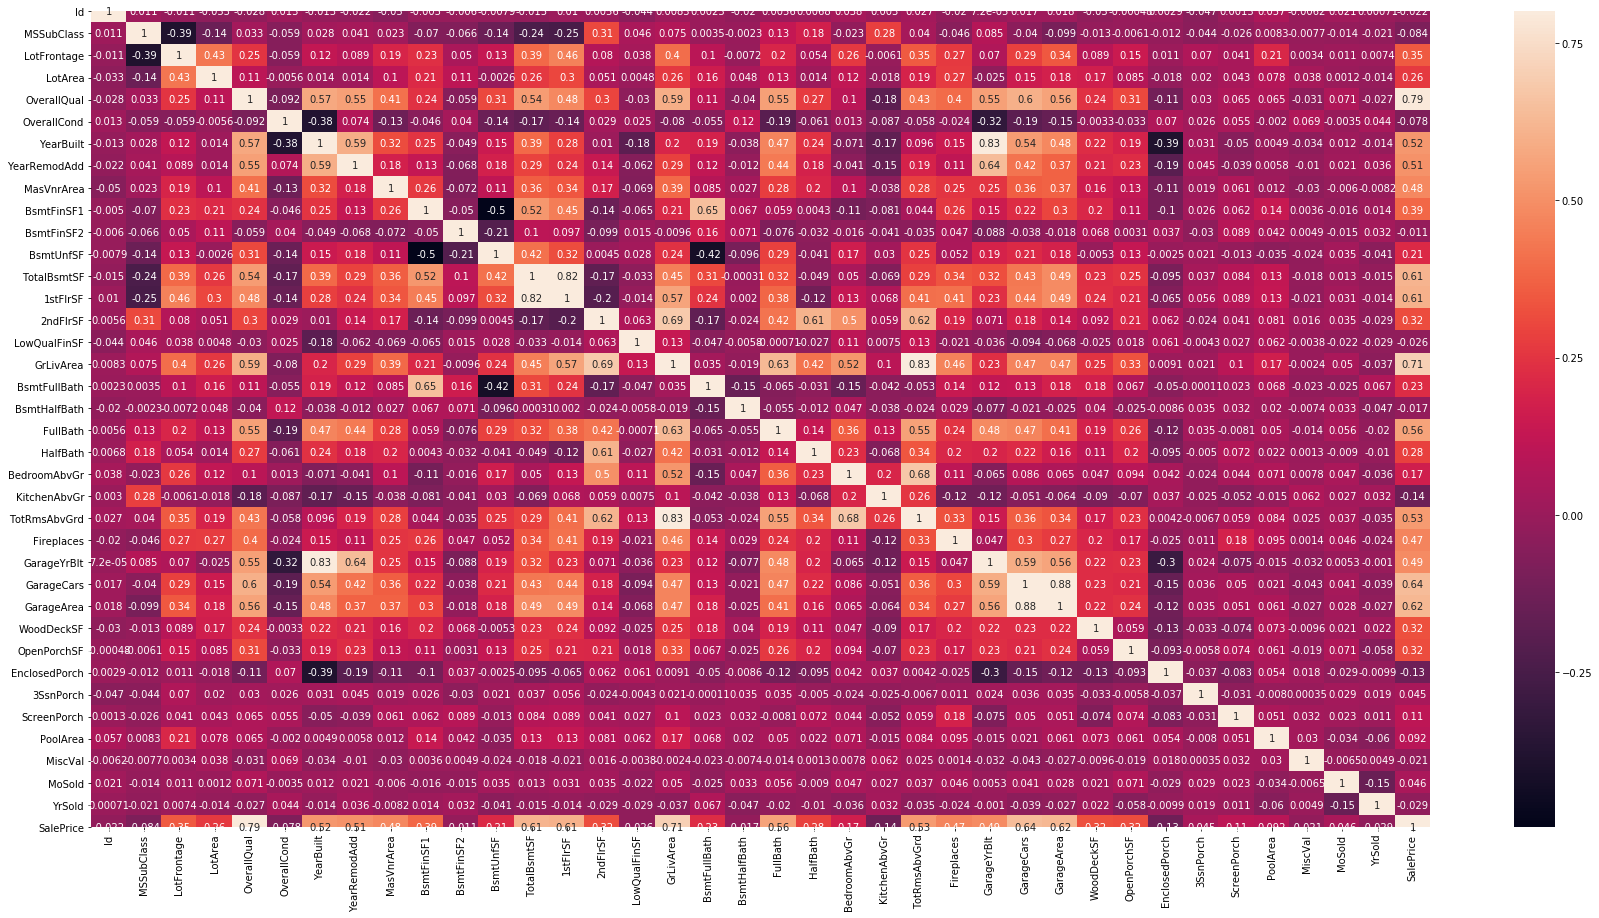

In [7]:
corrmat = house_train_data.corr()
f, ax = plt.subplots(figsize=(30,15))
sns.heatmap(corrmat, vmax=.8, annot=True);

In [126]:
# numerical features columns are all the columns that have numerical values as its data
numerical_feature_col = []
for feature_col in house_train_data.columns:
  if house_train_data[feature_col].dtypes != 'O':
    numerical_feature_col.append(feature_col)

# year features columns are not continuous so getting all the columns that defines some form of year values 
# year_feature_col will contain temporal variables which are date time variables 
year_feature_col = []
for feature_col in numerical_feature_col:
  if 'Yr' in feature_col or 'Year' in feature_col:
    year_feature_col.append(feature_col)



# here we will consider discrete feature columns which has unique values smaller than 25. 
discrete_feature_col =[]
for feature_col in numerical_feature_col:
  if len(house_train_data[feature_col].unique())<25 and feature_col not in year_feature_col+['Id']:
    discrete_feature_col.append(feature_col)



# continuous columns are columns that are not discrete 
continuous_feature_col =[]
for feature_col in numerical_feature_col:
  if feature_col not in discrete_feature_col+year_feature_col+['Id']:
    continuous_feature_col.append(feature_col)

# Checking for skewness

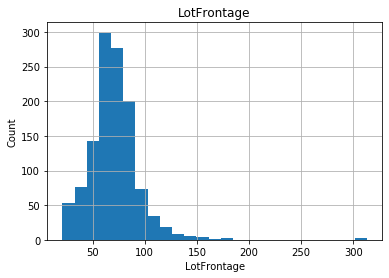

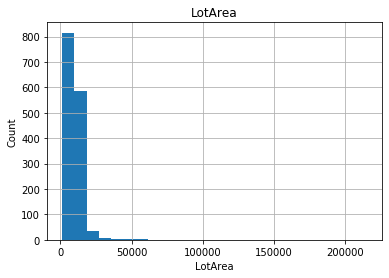

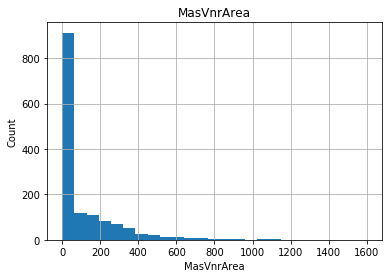

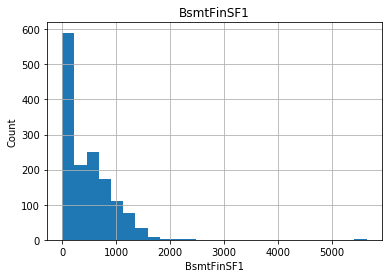

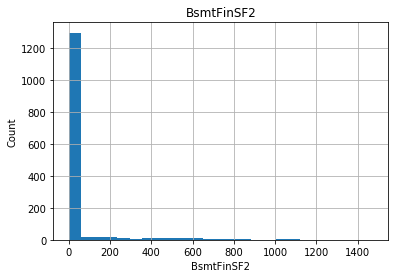

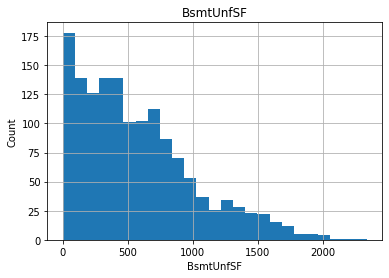

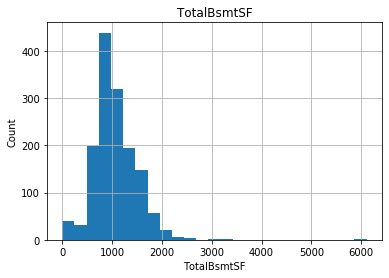

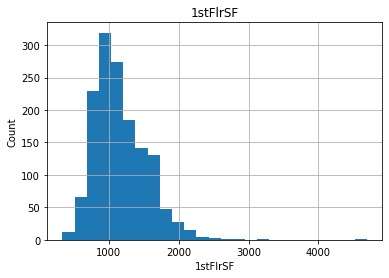

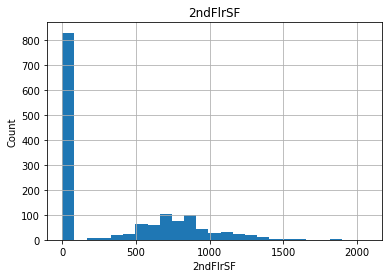

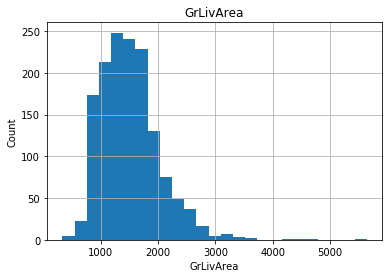

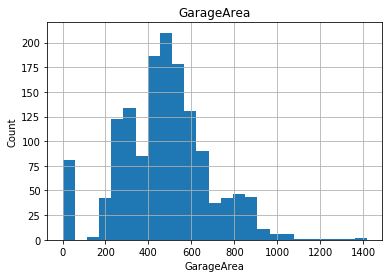

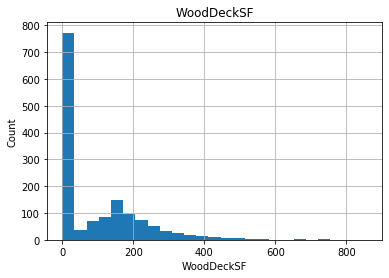

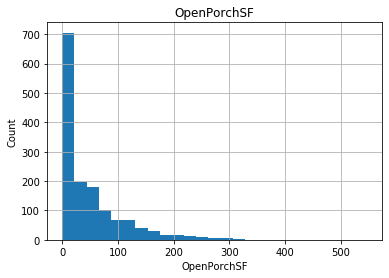

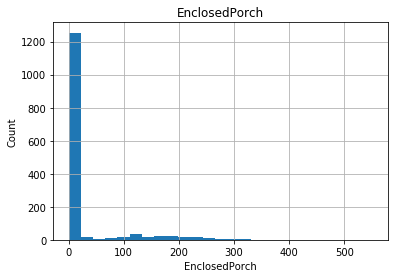

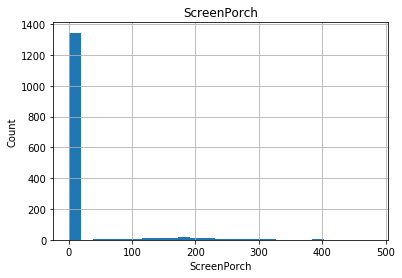

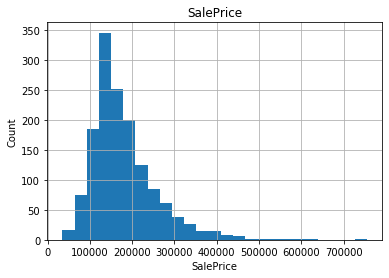

In [127]:
## Lets analyse the continuous values by creating histograms to understand the distribution

for feature_col in continuous_feature_col:
    data= house_train_data.copy()
    data[feature_col].hist(bins=25)
    plt.xlabel(feature_col)
    plt.ylabel("Count")
    plt.title(feature_col)
    plt.show()

From the above histogram we can see that lot of the feature columns have skewness, later we will try to remove this using log function

Analyzing temporal variables

Text(0.5, 1.0, 'House Price vs Sold Year')

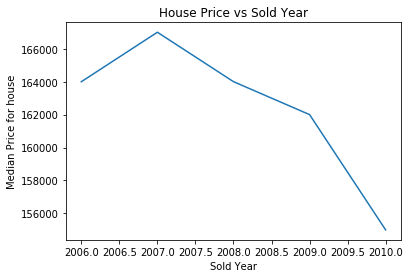

In [128]:

house_train_data.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Sold Year')
plt.ylabel('Median Price for house')
plt.title("House Price vs Sold Year")

from the above graph we can see that value of the house price is seen decreasing with the increasing year, which does not show a good correlation , so now lets try to compute the difference for each temporal variable with te year it was sold and see its correlation with the sale price.

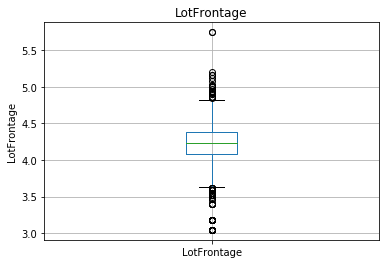

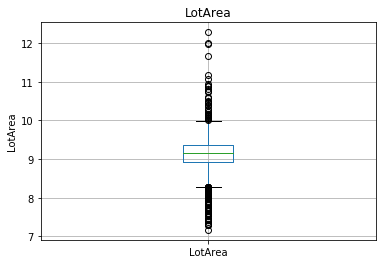

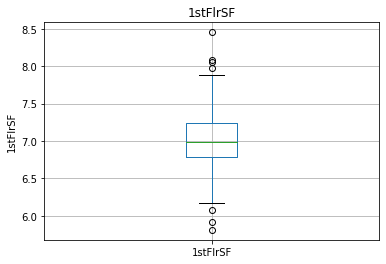

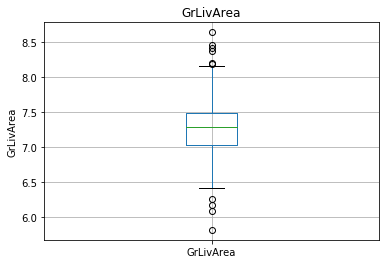

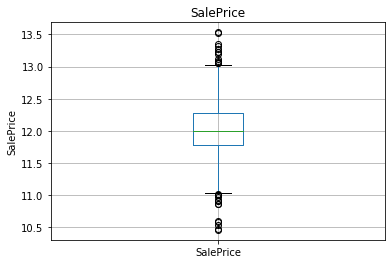

In [129]:
for feature_col in continuous_feature_col:
    data = house_train_data.copy()
    if 0 in data[feature_col].unique():
        pass
    else:
        data[feature_col]=np.log(data[feature_col])
        data.boxplot(column=feature_col)
        plt.ylabel(feature_col)
        plt.title(feature_col)
        plt.show()

From the above box plot for each feature we can see there are lot of outliers so when filling null values, best appraoch is to use median or mode.

# Handling Categorical Variables

In [130]:
# Making a list that will store the name of columns(features) that contains null values in its data
features_having_Na = []

# 'O' is to identify object type in the dataset, which means it contains string as its values 
for feature_col in house_train_data.columns:
    if house_train_data[feature_col].isnull().sum()>1 and house_train_data[feature_col].dtypes=='O':
        features_having_Na.append(feature_col)


In [131]:
features_having_Na

['Alley',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [132]:
# counting the total no of null values for each feature and than calculating its mean and returing its values 
for feature_col in features_having_Na:
      print('Feature {} has {}% of missing value '.format(feature_col,np.round(house_train_data[feature_col].isnull().mean(), 4)))


Feature Alley has 0.9377% of missing value 
Feature MasVnrType has 0.0055% of missing value 
Feature BsmtQual has 0.0253% of missing value 
Feature BsmtCond has 0.0253% of missing value 
Feature BsmtExposure has 0.026% of missing value 
Feature BsmtFinType1 has 0.0253% of missing value 
Feature BsmtFinType2 has 0.026% of missing value 
Feature FireplaceQu has 0.4726% of missing value 
Feature GarageType has 0.0555% of missing value 
Feature GarageFinish has 0.0555% of missing value 
Feature GarageQual has 0.0555% of missing value 
Feature GarageCond has 0.0555% of missing value 
Feature PoolQC has 0.9952% of missing value 
Feature Fence has 0.8075% of missing value 
Feature MiscFeature has 0.963% of missing value 


In [133]:
## Replace missing value with a new label
def replace_NA_value(house_train_data,features_having_Na):
    data = house_train_data.copy()
    # replace the null values in all features with a label name 'No_Value', this is done just to visualize the data properly
    data[features_having_Na]=data[features_having_Na].fillna('No_Value')
    return data

house_train_data = replace_NA_value(house_train_data,features_having_Na)
# here since all the null values are replaced with Missing label it should return 0 for all the features that were
# having null values above 
house_train_data[features_having_Na].isnull().sum()

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [134]:
dummydata = pd.read_csv('train.csv')

In [135]:
dummydata

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,Gas

in the below dataset we can see that all the NaN values are replaced with No_Value label, for example- in Alley column above we can see it was showing Nan as its value and now in the below datasets it shows No_Value, this is done just to have a better representation of the data

In [136]:
house_train_data.head(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,No_Value,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,No_Value,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,No_Value,No_Value,No_Value,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,No_Value,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,No_Value,No_Value,No_Value,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,No_Value,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,No_Value,No_Value,No_Value,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,No_Value,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,No_Value,No_Value,No_Value,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,No_Value,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,No_Value,No_Value,No_Value,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,No_Value,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,No_Value,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,No_Value,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,No_Value,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,No_Value,No_Value,No_Value,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,No_Value,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,No_Value,No_Value,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,No_Value,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,No_Value,No_Value,No_Value,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7

# Handling Numerical Variables

In [137]:
## checking for numerical features the contains null values and storing it in a list 

numFeatures_having_Na  = []

for feature_col in house_train_data.columns:
  # here we do != '0' since we are looking for numerical feature, if we do == '0', it looks for objects containing strings as values
    if house_train_data[feature_col].isnull().sum()>1 and house_train_data[feature_col].dtypes !='O':
        numFeatures_having_Na.append(feature_col)

# counting the total no of null values for each numerical feature and than calculating its mean and returing its values, 
# we round it to 4 decimal places 
for feature_col in numFeatures_having_Na:
        print('Feature {} has {}% of missing value '.format(feature_col,np.round(house_train_data[feature_col].isnull().mean(), 4)))



Feature LotFrontage has 0.1774% of missing value 
Feature MasVnrArea has 0.0055% of missing value 
Feature GarageYrBlt has 0.0555% of missing value 


In [138]:
## comparing the difference between temporal variable features columns with SalePrice column

for feature in year_feature_col:
    if feature!='YrSold':
        data= house_train_data.copy()
        ## comparing the difference between the year sold and all other temporal variable features columns 
        data[feature]=data['YrSold'] - data[feature]

In [139]:
##  now we will replace all the null values in features that are numerical with the median value for that feature

for feature_col in numFeatures_having_Na:

    ## calcualting median values for each feature columns 
    median_val = house_train_data[feature_col].median()
    
    ## here we will create a new feature columns that show if it had the null values, it will show 1 for null and 0 if it does not have null 
    house_train_data[feature_col+'Null']=np.where(house_train_data[feature_col].isnull(),1,0)
    # now the null values will be replaces with median from the column
    house_train_data[feature_col].fillna(median_val,inplace=True)
    
house_train_data[numFeatures_having_Na].isnull().sum()
    

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

in the below data, we can see that new columns are added at the end and when there is 1 it means that column had null values which is replaced with the median value

In [140]:
house_train_data.head(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontageNull,MasVnrAreaNull,GarageYrBltNull
0,1,60,RL,65.0,8450,Pave,No_Value,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,No_Value,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,No_Value,No_Value,No_Value,0,2,2008,WD,Normal,208500,0,0,0
1,2,20,RL,80.0,9600,Pave,No_Value,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,No_Value,No_Value,No_Value,0,5,2007,WD,Normal,181500,0,0,0
2,3,60,RL,68.0,11250,Pave,No_Value,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,No_Value,No_Value,No_Value,0,9,2008,WD,Normal,223500,0,0,0
3,4,70,RL,60.0,9550,Pave,No_Value,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,No_Value,No_Value,No_Value,0,2,2006,WD,Abnorml,140000,0,0,0
4,5,60,RL,84.0,14260,Pave,No_Value,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,No_Value,No_Value,No_Value,0,12,2008,WD,Normal,250000,0,0,0
5,6,50,RL,85.0,14115,Pave,No_Value,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,No_Value,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,No_Value,MnPrv,Shed,700,10,2009,WD,Normal,143000,0,0,0
6,7,20,RL,75.0,10084,Pave,No_Value,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,No_Value,No_Value,No_Value,0,8,2007,WD,Normal,307000,0,0,0
7,8,60,RL,69.0,10382,Pave,No_Value,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,No_Value,No_Value,Shed,350,11,2009,WD,Normal,200000,1,0,0
8,9,50,RM,51.0,6120,Pave,No_Value,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468

In [141]:
## changing all the temporal(date-time) variables, into the difference of the year sold - that feature column value 
# it will change all the values in those feature columns into actual no of years 

for feature_col in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
       
    house_train_data[feature_col]= house_train_data['YrSold'] - house_train_data[feature_col]

in the below data set we can see that all the values in the temporal variable column is now changed into the actual no of years

In [142]:
house_train_data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontageNull,MasVnrAreaNull,GarageYrBltNull
0,1,60,RL,65.0,8450,Pave,No_Value,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,No_Value,Attchd,5.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,No_Value,No_Value,No_Value,0,2,2008,WD,Normal,208500,0,0,0
1,2,20,RL,80.0,9600,Pave,No_Value,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,No_Value,No_Value,No_Value,0,5,2007,WD,Normal,181500,0,0,0
2,3,60,RL,68.0,11250,Pave,No_Value,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,No_Value,No_Value,No_Value,0,9,2008,WD,Normal,223500,0,0,0
3,4,70,RL,60.0,9550,Pave,No_Value,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,No_Value,No_Value,No_Value,0,2,2006,WD,Abnorml,140000,0,0,0
4,5,60,RL,84.0,14260,Pave,No_Value,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,No_Value,No_Value,No_Value,0,12,2008,WD,Normal,250000,0,0,0
5,6,50,RL,85.0,14115,Pave,No_Value,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,16,14,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,No_Value,Attchd,16.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,No_Value,MnPrv,Shed,700,10,2009,WD,Normal,143000,0,0,0
6,7,20,RL,75.0,10084,Pave,No_Value,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,3,2,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,3.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,No_Value,No_Value,No_Value,0,8,2007,WD,Normal,307000,0,0,0
7,8,60,RL,69.0,10382,Pave,No_Value,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,36,36,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,36.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,No_Value,No_Value,Shed,350,11,2009,WD,Normal,200000,1,0,0
8,9,50,RM,51.0,6120,Pave,No_Value,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,77,58,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,77.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,No_Value,No_Value,No_Value,0,4,2008,WD,Abno

In [143]:
# from the above skewness analysis it was found that all the below features showed skewness in its distribution
# so now we will handle it using np.log function which will convert it into normal distribution 
num_skewed_feature_cols = ['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']

for feature_col in num_skewed_feature_cols:
    house_train_data[feature_col] = np.log(house_train_data[feature_col])

In [144]:
house_train_data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontageNull,MasVnrAreaNull,GarageYrBltNull
0,1,60,RL,4.174387,9.041922,Pave,No_Value,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,6.752270,854,0,7.444249,1,0,2,1,3,1,Gd,8,Typ,0,No_Value,Attchd,5.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,No_Value,No_Value,No_Value,0,2,2008,WD,Normal,12.247694,0,0,0
1,2,20,RL,4.382027,9.169518,Pave,No_Value,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,7.140453,0,0,7.140453,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,No_Value,No_Value,No_Value,0,5,2007,WD,Normal,12.109011,0,0,0
2,3,60,RL,4.219508,9.328123,Pave,No_Value,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,6.824374,866,0,7.487734,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,No_Value,No_Value,No_Value,0,9,2008,WD,Normal,12.317167,0,0,0
3,4,70,RL,4.094345,9.164296,Pave,No_Value,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,6.867974,756,0,7.448334,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,No_Value,No_Value,No_Value,0,2,2006,WD,Abnorml,11.849398,0,0,0
4,5,60,RL,4.430817,9.565214,Pave,No_Value,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,7.043160,1053,0,7.695303,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,No_Value,No_Value,No_Value,0,12,2008,WD,Normal,12.429216,0,0,0
5,6,50,RL,4.442651,9.554993,Pave,No_Value,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,16,14,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,6.679599,566,0,7.216709,1,0,1,1,1,1,TA,5,Typ,0,No_Value,Attchd,16.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,No_Value,MnPrv,Shed,700,10,2009,WD,Normal,11.870600,0,0,0
6,7,20,RL,4.317488,9.218705,Pave,No_Value,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,3,2,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,7.434848,0,0,7.434848,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,3.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,No_Value,No_Value,No_Value,0,8,2007,WD,Normal,12.634603,0,0,0
7,8,60,RL,4.234107,9.247829,Pave,No_Value,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,36,36,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,7.009409,983,0,7.644919,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,36.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,No_Value,No_Value,Shed,350,11,2009,WD,Normal,12.206073,1,0,0
8,9,50,RM,3.931826,8.719317,Pave,No_Value,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,77,58,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Un

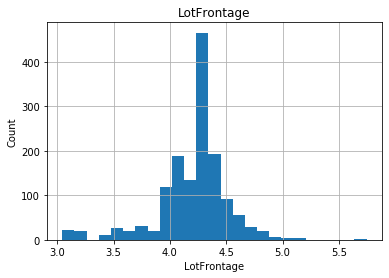

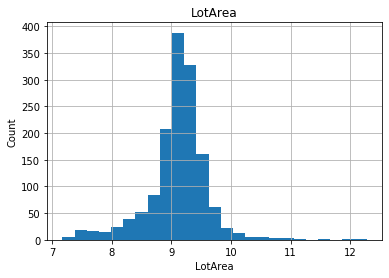

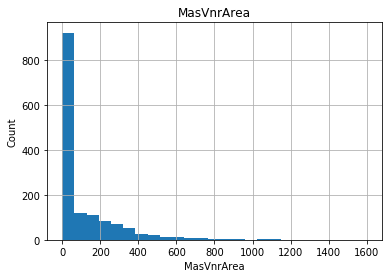

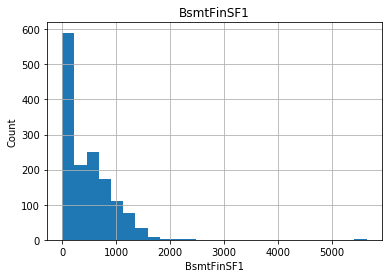

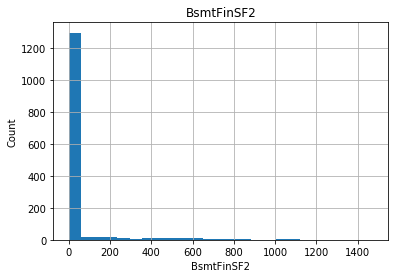

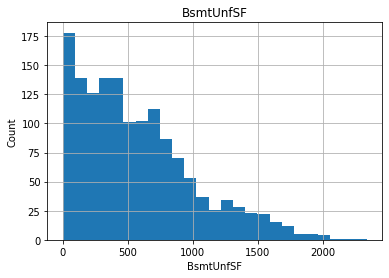

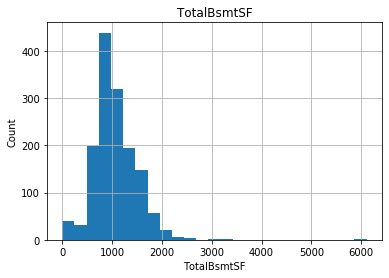

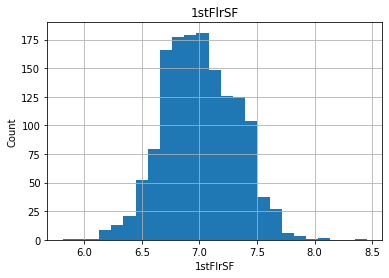

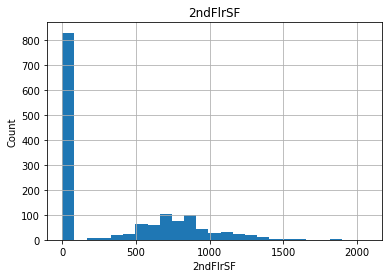

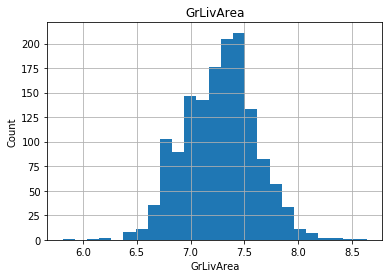

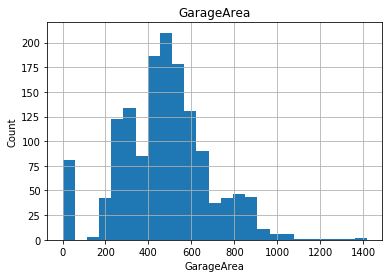

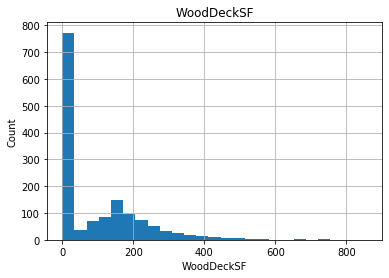

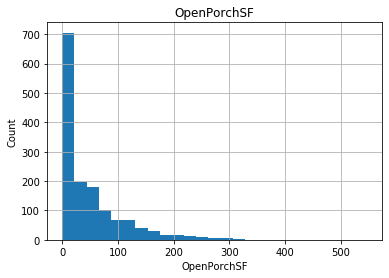

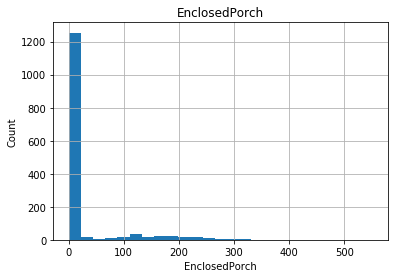

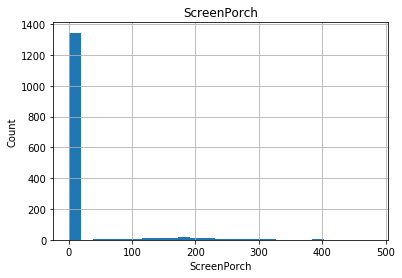

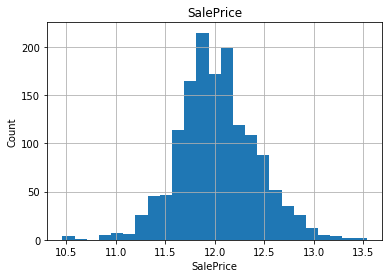

In [145]:
# checking whether all skewed values are turned into normal distribution 
for feature_col in continuous_feature_col:
    data= house_train_data.copy()
    data[feature_col].hist(bins=25)
    plt.xlabel(feature_col)
    plt.ylabel("Count")
    plt.title(feature_col)
    plt.show()

from the above histogram, all the skewed distributions are now converted into normal distributions which is very important to be done when using regresssion model

Now we will create a new label for all the rare categorical features from feature columns( features that are present in less than 1% of the observations). We will skip this categorical features in our model since it does not provide that much importance in the dataset.

In [146]:
categorical_feature_col =[feature_col for feature_col in house_train_data.columns if house_train_data[feature_col].dtype=='O']

In [147]:
categorical_feature_col

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [148]:
for feature_col in categorical_feature_col:
  # groupping by category that are present inside each feature column using the count of saleprice and than dividing by the len of dataset
  # to get percentage value
    temp = house_train_data.groupby(feature_col)['SalePrice'].count()/len(house_train_data)
    # if the temporary percent > 0.01 than consider the index inside the temp variable 
    temp_dframe = temp[temp>0.01].index
    # if the dataset of feature col is in the index than take the dataset else convert it into new Rare_Variable
    house_train_data[feature_col] = np.where(house_train_data[feature_col].isin(temp_dframe),house_train_data[feature_col],'Rare_Variable')

In [149]:
house_train_data.head(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontageNull,MasVnrAreaNull,GarageYrBltNull
0,1,60,RL,4.174387,9.041922,Pave,No_Value,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,6.752270,854,0,7.444249,1,0,2,1,3,1,Gd,8,Typ,0,No_Value,Attchd,5.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,No_Value,No_Value,No_Value,0,2,2008,WD,Normal,12.247694,0,0,0
1,2,20,RL,4.382027,9.169518,Pave,No_Value,Reg,Lvl,AllPub,FR2,Gtl,Rare_Variable,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,7.140453,0,0,7.140453,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,No_Value,No_Value,No_Value,0,5,2007,WD,Normal,12.109011,0,0,0
2,3,60,RL,4.219508,9.328123,Pave,No_Value,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,6.824374,866,0,7.487734,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,No_Value,No_Value,No_Value,0,9,2008,WD,Normal,12.317167,0,0,0
3,4,70,RL,4.094345,9.164296,Pave,No_Value,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,6.867974,756,0,7.448334,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,No_Value,No_Value,No_Value,0,2,2006,WD,Abnorml,11.849398,0,0,0
4,5,60,RL,4.430817,9.565214,Pave,No_Value,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,7.043160,1053,0,7.695303,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,No_Value,No_Value,No_Value,0,12,2008,WD,Normal,12.429216,0,0,0
5,6,50,RL,4.442651,9.554993,Pave,No_Value,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,16,14,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Rare_Variable,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,6.679599,566,0,7.216709,1,0,1,1,1,1,TA,5,Typ,0,No_Value,Attchd,16.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,No_Value,MnPrv,Shed,700,10,2009,WD,Normal,11.870600,0,0,0
6,7,20,RL,4.317488,9.218705,Pave,No_Value,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,3,2,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,7.434848,0,0,7.434848,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,3.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,No_Value,No_Value,No_Value,0,8,2007,WD,Normal,12.634603,0,0,0
7,8,60,RL,4.234107,9.247829,Pave,No_Value,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,36,36,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,7.009409,983,0,7.644919,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,36.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,No_Value,No_Value,Shed,350,11,2009,WD,Normal,12.206073,1,0,0
8,9,50,RM,3.931826,8.719317,Pave,No_Value,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,77,58,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA

In [150]:
house_train_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# Feature Scaling

Since in our data, there are different types of columns which has different measurements and units so it is very important to apply feature scaling so that we can apply ml techniques in a good way.

In [151]:
from sklearn.preprocessing import MinMaxScaler

Now we will not use Id since we will be dropping that column and SalePrice is our dependent feature so we will also skip that from scalable feature

In [152]:
for feature_col in categorical_feature_col:
    ordered_labels = house_train_data.groupby([feature_col])['SalePrice'].mean().sort_values().index
    ordered_labels = {k:i for i,k in enumerate(ordered_labels,0)}
    house_train_data[feature_col] = house_train_data[feature_col].map(ordered_labels)

In [153]:
scalable_feature = [feature_col for feature_col in house_train_data.columns if feature_col not in ['Id','SalePrice'] ]


In [154]:
scalable_feature

['MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'Enc

In [155]:
scaler = MinMaxScaler()
scaler.fit(house_train_data[scalable_feature])

MinMaxScaler()

In [156]:
scaler.transform(house_train_data[scalable_feature])

array([[0.23529412, 0.75      , 0.41820812, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.75      , 0.49506375, ..., 0.        , 0.        ,
        0.        ],
       [0.23529412, 0.75      , 0.434909  , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.29411765, 0.75      , 0.42385922, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.75      , 0.434909  , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.75      , 0.47117546, ..., 0.        , 0.        ,
        0.        ]])

from above we can see that we are getting an array from the transform method so we need to convert it into a dataframe, and we will also append and Id and SalePrice columns to it.

In [157]:
# creating a dataframe of scalable feature columns , and appending id and saleprice to it 
house_train_data = pd.concat([house_train_data[['Id','SalePrice']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(house_train_data[scalable_feature]), columns=scalable_feature)],
                    axis=1)

In [158]:
house_train_data

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontageNull,MasVnrAreaNull,GarageYrBltNull
0,1,12.247694,0.235294,0.75,0.418208,0.366344,1.0,1.0,0.000000,0.333333,1.0,0.00,0.0,0.636364,0.4,1.0,0.75,1.0,0.666667,0.500,0.036765,0.098361,0.0,0.0,1.0,1.0,0.50,0.122500,0.666667,1.000000,1.00,0.75,0.75,0.25,1.000000,0.125089,0.833333,0.000000,0.064212,0.140098,1.0,1.00,1.0,1.000000,0.356155,0.413559,0.0,0.577712,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.500000,1.00,0.000000,0.2,0.8,0.046729,0.666667,0.50,0.386460,0.666667,1.0,1.0,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.0,1.00,1.0,0.00000,0.090909,0.50,0.666667,0.75,0.0,0.0,0.0
1,2,12.109011,0.000000,0.75,0.495064,0.391317,1.0,1.0,0.000000,0.333333,1.0,0.50,0.0,0.500000,0.2,1.0,0.75,0.6,0.555556,0.875,0.227941,0.524590,0.0,0.0,0.4,0.3,0.25,0.000000,0.333333,1.000000,0.50,0.75,0.75,1.00,0.666667,0.173281,0.833333,0.000000,0.121575,0.206547,1.0,1.00,1.0,1.000000,0.503056,0.000000,0.0,0.470245,0.000000,0.5,0.666667,0.0,0.375,0.333333,0.333333,0.333333,1.00,0.333333,0.6,0.8,0.289720,0.666667,0.50,0.324401,0.666667,1.0,1.0,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.0,1.00,1.0,0.00000,0.363636,0.25,0.666667,0.75,0.0,0.0,0.0
2,3,12.317167,0.235294,0.75,0.434909,0.422359,1.0,1.0,0.333333,0.333333,1.0,0.00,0.0,0.636364,0.4,1.0,0.75,1.0,0.666667,0.500,0.051471,0.114754,0.0,0.0,1.0,1.0,0.50,0.101250,0.666667,1.000000,1.00,0.75,0.75,0.50,1.000000,0.086109,0.833333,0.000000,0.185788,0.150573,1.0,1.00,1.0,1.000000,0.383441,0.419370,0.0,0.593095,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.333333,1.00,0.333333,0.6,0.8,0.065421,0.666667,0.50,0.428773,0.666667,1.0,1.0,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.0,1.00,1.0,0.00000,0.727273,0.50,0.666667,0.75,0.0,0.0,0.0
3,4,11.849398,0.294118,0.75,0.388581,0.390295,1.0,1.0,0.333333,0.333333,1.0,0.25,0.0,0.727273,0.4,1.0,0.75,1.0,0.666667,0.500,0.669118,0.606557,0.0,0.0,0.2,0.4,0.25,0.000000,0.333333,1.000000,0.25,0.50,1.00,0.25,0.666667,0.038271,0.833333,0.000000,0.231164,0.123732,1.0,0.75,1.0,1.000000,0.399941,0.366102,0.0,0.579157,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.666667,0.416667,1.00,0.333333,0.8,0.4,0.074766,0.333333,0.75,0.452750,0.666667,1.0,1.0,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.0,1.00,1.0,0.00000,0.090909,0.00,0.666667,0.00,0.0,0.0,0.0
4,5,12.429216,0.235294,0.75,0.513123,0.468761,1.0,1.0,0.333333,0.333333,1.0,0.50,0.0,1.000000,0.4,1.0,0.75,1.0,0.777778,0.500,0.058824,0.147541,0.0,0.0,1.0,1.0,0.50,0.218750,0.666667,1.000000,1.00,0.75,0.75,0.75,1.000000,0.116052,0.833333,0.000000,0.209760,0.187398,1.0,1.00,1.0,1.000000,0.466237,0.509927,0.0,0.666523,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.666667,0.583333,1.00,0.333333,0.6,0.8,0.074766,0.666667,0.75,0.589563,0.666667,1.0,1.0,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.0,1.00,1.0,0.00000,1.000000,0.50,0.666667,0.75,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,12

saving the train data after performing feature engineering into csv, which will than be used for further analysis

In [159]:
house_train_data.to_csv('FE_train_orig.csv',index=False)

# Doing the same type of Feature engineering which was performed on the train data for test data

In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# for visualizing all the columns in the data frame
pd.pandas.set_option('display.max_columns', None)

In [161]:
house_test_data = pd.read_csv('test.csv')

house_test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [162]:
house_test_data.shape

(1459, 80)

In [163]:
# numerical features columns are all the columns that have numerical values as its data
numerical_feature_col = []
for feature_col in house_test_data.columns:
  if house_test_data[feature_col].dtypes != 'O':
    numerical_feature_col.append(feature_col)

# year features columns are not continuous so getting all the columns that defines some form of year values
# year_feature_col will contain temporal variables which are date time variables
year_feature_col = []
for feature_col in numerical_feature_col:
  if 'Yr' in feature_col or 'Year' in feature_col:
    year_feature_col.append(feature_col)



# here we will consider discrete feature columns which has unique values smaller than 25.
discrete_feature_col =[]
for feature_col in numerical_feature_col:
  if len(house_test_data[feature_col].unique())<25 and feature_col not in year_feature_col+['Id']:
    discrete_feature_col.append(feature_col)



# continuous columns are columns that are not discrete
continuous_feature_col =[]
for feature_col in numerical_feature_col:
  if feature_col not in discrete_feature_col+year_feature_col+['Id']:
    continuous_feature_col.append(feature_col)

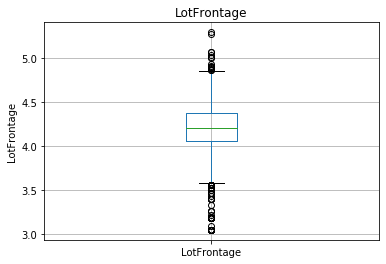

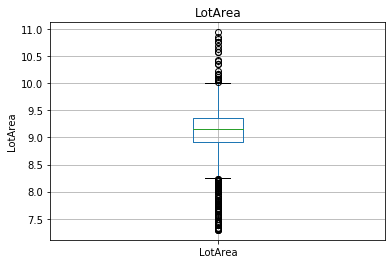

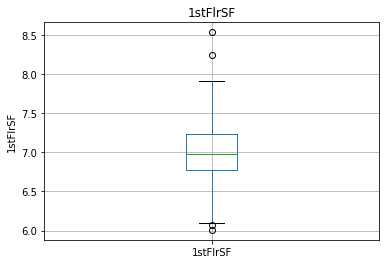

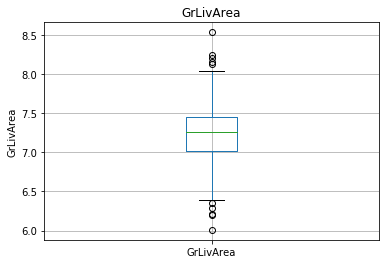

In [164]:
for feature_col in continuous_feature_col:
    data = house_test_data.copy()
    if 0 in data[feature_col].unique():
        pass
    else:
        data[feature_col]=np.log(data[feature_col])
        data.boxplot(column=feature_col)
        plt.ylabel(feature_col)
        plt.title(feature_col)
        plt.show()

From the above box plot for each feature we can see there are lot of outliers so when filling null values, best appraoch is to use median or mode.

# Handling Categorical Variables

In [165]:
# Making a list that will store the name of columns(features) that contains null values in its data
features_having_Na = []

# 'O' is to identify object type in the dataset, which means it contains string as its values
for feature_col in house_test_data.columns:
    if house_test_data[feature_col].isnull().sum()>1 and house_test_data[feature_col].dtypes=='O':
        features_having_Na.append(feature_col)


In [166]:
features_having_Na

['MSZoning',
 'Alley',
 'Utilities',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [167]:
# counting the total no of null values for each feature and than calculating its mean and returing its values
for feature_col in features_having_Na:
      print('Feature {} has {}% of missing value '.format(feature_col,np.round(house_test_data[feature_col].isnull().mean(), 4)))


Feature MSZoning has 0.0027% of missing value 
Feature Alley has 0.9267% of missing value 
Feature Utilities has 0.0014% of missing value 
Feature MasVnrType has 0.011% of missing value 
Feature BsmtQual has 0.0302% of missing value 
Feature BsmtCond has 0.0308% of missing value 
Feature BsmtExposure has 0.0302% of missing value 
Feature BsmtFinType1 has 0.0288% of missing value 
Feature BsmtFinType2 has 0.0288% of missing value 
Feature Functional has 0.0014% of missing value 
Feature FireplaceQu has 0.5003% of missing value 
Feature GarageType has 0.0521% of missing value 
Feature GarageFinish has 0.0535% of missing value 
Feature GarageQual has 0.0535% of missing value 
Feature GarageCond has 0.0535% of missing value 
Feature PoolQC has 0.9979% of missing value 
Feature Fence has 0.8012% of missing value 
Feature MiscFeature has 0.965% of missing value 


In [168]:
## Replace missing value with a new label
def replace_NA_value(house_test_data,features_having_Na):
    data = house_test_data.copy()
    # replace the null values in all features with a label name 'No_Value', this is done just to visualize the data properly
    data[features_having_Na]=data[features_having_Na].fillna('No_Value')
    return data

house_test_data = replace_NA_value(house_test_data,features_having_Na)
# here since all the null values are replaced with Missing label it should return 0 for all the features that were
# having null values above
house_test_data[features_having_Na].isnull().sum()

MSZoning        0
Alley           0
Utilities       0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Functional      0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [169]:
dummydata = pd.read_csv('test.csv')

In [170]:
dummydata

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,Comp

in the below dataset we can see that all the NaN values are replaced with No_Value label, for example- in Alley column above we can see it was showing Nan as its value and now in the below datasets it shows No_Value, this is done just to have a better representation of the data.

In [171]:
house_test_data.head(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,No_Value,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,No_Value,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,No_Value,MnPrv,No_Value,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,No_Value,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,No_Value,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,No_Value,No_Value,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,No_Value,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,No_Value,MnPrv,No_Value,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,No_Value,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,No_Value,No_Value,No_Value,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,No_Value,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,No_Value,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,No_Value,No_Value,No_Value,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,No_Value,IR1,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1993,1994,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,763.0,763.0,GasA,Gd,Y,SBrkr,763,892,0,1655,0.0,0.0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1993.0,Fin,2.0,440.0,TA,TA,Y,157,84,0,0,0,0,No_Value,No_Value,No_Value,0,4,2010,WD,Normal
6,1467,20,RL,NaN,7980,Pave,No_Value,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,1Story,6,7,1992,2007,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,Gd,PConc,Gd,TA,No,ALQ,935.0,Unf,0.0,233.0,1168.0,GasA,Ex,Y,SBrkr,1187,0,0,1187,1.0,0.0,2,0,3,1,TA,6,Typ,0,No_Value,Attchd,1992.0,Fin,2.0,420.0,TA,TA,Y,483,21,0,0,0,0,No_Value,GdPrv,Shed,500,3,2010,WD,Normal
7,1468,60,RL,63.0,8402,Pave,No_Value,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1998,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,789.0,789.0,GasA,Gd,Y,SBrkr,789,676,0,1465,0.0,0.0,2,1,3,1,TA,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,393.0,TA,TA,Y,0,75,0,0,0,0,No_Value,No_Value,No_Value,0,5,2010,WD,Normal
8,1469,20,RL,85.0,10176,Pave,No_Value,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,1Story,7,5,1990,1990,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,PConc,Gd,TA,Gd,GLQ,637.0,Unf,0.0,663.0,1300.0,GasA,Gd,Y,SBrkr,1341,0,0,1341,1.0,0.0,1,1,2,1,Gd,5,Typ,1,Po,Attchd,1990.0,Unf,2.0,506.0,TA,TA,Y

# Handling Numerical Variables

In [172]:
## checking for numerical features the contains null values and storing it in a list

numFeatures_having_Na  = []

for feature_col in house_test_data.columns:
  # here we do != '0' since we are looking for numerical feature, if we do == '0', it looks for objects containing strings as values
    if house_test_data[feature_col].isnull().sum()>1 and house_test_data[feature_col].dtypes !='O':
        numFeatures_having_Na.append(feature_col)

# counting the total no of null values for each numerical feature and than calculating its mean and returing its values,
# we round it to 4 decimal places
for feature_col in numFeatures_having_Na:
        print('Feature {} has {}% of missing value '.format(feature_col,np.round(house_test_data[feature_col].isnull().mean(), 4)))



Feature LotFrontage has 0.1556% of missing value 
Feature MasVnrArea has 0.0103% of missing value 
Feature BsmtFullBath has 0.0014% of missing value 
Feature BsmtHalfBath has 0.0014% of missing value 
Feature GarageYrBlt has 0.0535% of missing value 


In [173]:
## comparing the difference between temporal variable features columns with SalePrice column

for feature in year_feature_col:
    if feature!='YrSold':
        data= house_test_data.copy()
        ## comparing the difference between the year sold and all other temporal variable features columns
        data[feature]=data['YrSold'] - data[feature]

In [174]:
##  now we will replace all the null values in features that are numerical with the median value for that feature

for feature_col in numFeatures_having_Na:

    ## calcualting median values for each feature columns
    median_val = house_test_data[feature_col].median()

    ## here we will create a new feature columns that show if it had the null values, it will show 1 for null and 0 if it does not have null
    house_test_data[feature_col+'Null']=np.where(house_test_data[feature_col].isnull(),1,0)
    # now the null values will be replaces with median from the column
    house_test_data[feature_col].fillna(median_val,inplace=True)

house_test_data[numFeatures_having_Na].isnull().sum()


LotFrontage     0
MasVnrArea      0
BsmtFullBath    0
BsmtHalfBath    0
GarageYrBlt     0
dtype: int64

in the below data, we can see that new columns are added at the end and when there is 1 it means that column had null values which is replaced with the median value.

In [175]:
house_test_data.head(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontageNull,MasVnrAreaNull,BsmtFullBathNull,BsmtHalfBathNull,GarageYrBltNull
0,1461,20,RH,80.0,11622,Pave,No_Value,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,No_Value,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,No_Value,MnPrv,No_Value,0,6,2010,WD,Normal,0,0,0,0,0
1,1462,20,RL,81.0,14267,Pave,No_Value,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,No_Value,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,No_Value,No_Value,Gar2,12500,6,2010,WD,Normal,0,0,0,0,0
2,1463,60,RL,74.0,13830,Pave,No_Value,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,No_Value,MnPrv,No_Value,0,3,2010,WD,Normal,0,0,0,0,0
3,1464,60,RL,78.0,9978,Pave,No_Value,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,No_Value,No_Value,No_Value,0,6,2010,WD,Normal,0,0,0,0,0
4,1465,120,RL,43.0,5005,Pave,No_Value,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,No_Value,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,No_Value,No_Value,No_Value,0,1,2010,WD,Normal,0,0,0,0,0
5,1466,60,RL,75.0,10000,Pave,No_Value,IR1,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1993,1994,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,763.0,763.0,GasA,Gd,Y,SBrkr,763,892,0,1655,0.0,0.0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1993.0,Fin,2.0,440.0,TA,TA,Y,157,84,0,0,0,0,No_Value,No_Value,No_Value,0,4,2010,WD,Normal,0,0,0,0,0
6,1467,20,RL,67.0,7980,Pave,No_Value,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,1Story,6,7,1992,2007,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,Gd,PConc,Gd,TA,No,ALQ,935.0,Unf,0.0,233.0,1168.0,GasA,Ex,Y,SBrkr,1187,0,0,1187,1.0,0.0,2,0,3,1,TA,6,Typ,0,No_Value,Attchd,1992.0,Fin,2.0,420.0,TA,TA,Y,483,21,0,0,0,0,No_Value,GdPrv,Shed,500,3,2010,WD,Normal,1,0,0,0,0
7,1468,60,RL,63.0,8402,Pave,No_Value,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1998,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,789.0,789.0,GasA,Gd,Y,SBrkr,789,676,0,1465,0.0,0.0,2,1,3,1,TA,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,393.0,TA,TA,Y,0,75,0,0,0,0,No_Value,No_Value,No_Value,0,5,2010,WD,Normal,0,0,0,0,0
8,1469,20,RL,85.0,10176,Pave,No_Value,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,1Story,7,5,1990,1990,Gable,CompShg,HdBoard,Hd

In [176]:
## changing all the temporal(date-time) variables, into the difference of the year sold - that feature column value
# it will change all the values in those feature columns into actual no of years

for feature_col in ['YearBuilt','YearRemodAdd','GarageYrBlt']:

    house_test_data[feature_col]= house_test_data['YrSold'] - house_test_data[feature_col]

in the below data set we can see that all the values in the temporal variable column is now changed into the actual no of years

In [177]:
house_test_data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontageNull,MasVnrAreaNull,BsmtFullBathNull,BsmtHalfBathNull,GarageYrBltNull
0,1461,20,RH,80.0,11622,Pave,No_Value,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,49,49,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,No_Value,Attchd,49.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,No_Value,MnPrv,No_Value,0,6,2010,WD,Normal,0,0,0,0,0
1,1462,20,RL,81.0,14267,Pave,No_Value,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,52,52,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,No_Value,Attchd,52.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,No_Value,No_Value,Gar2,12500,6,2010,WD,Normal,0,0,0,0,0
2,1463,60,RL,74.0,13830,Pave,No_Value,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,13,12,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,13.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,No_Value,MnPrv,No_Value,0,3,2010,WD,Normal,0,0,0,0,0
3,1464,60,RL,78.0,9978,Pave,No_Value,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,12,12,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,12.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,No_Value,No_Value,No_Value,0,6,2010,WD,Normal,0,0,0,0,0
4,1465,120,RL,43.0,5005,Pave,No_Value,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,18,18,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,No_Value,Attchd,18.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,No_Value,No_Value,No_Value,0,1,2010,WD,Normal,0,0,0,0,0
5,1466,60,RL,75.0,10000,Pave,No_Value,IR1,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,17,16,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,763.0,763.0,GasA,Gd,Y,SBrkr,763,892,0,1655,0.0,0.0,2,1,3,1,TA,7,Typ,1,TA,Attchd,17.0,Fin,2.0,440.0,TA,TA,Y,157,84,0,0,0,0,No_Value,No_Value,No_Value,0,4,2010,WD,Normal,0,0,0,0,0
6,1467,20,RL,67.0,7980,Pave,No_Value,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,1Story,6,7,18,3,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,Gd,PConc,Gd,TA,No,ALQ,935.0,Unf,0.0,233.0,1168.0,GasA,Ex,Y,SBrkr,1187,0,0,1187,1.0,0.0,2,0,3,1,TA,6,Typ,0,No_Value,Attchd,18.0,Fin,2.0,420.0,TA,TA,Y,483,21,0,0,0,0,No_Value,GdPrv,Shed,500,3,2010,WD,Normal,1,0,0,0,0
7,1468,60,RL,63.0,8402,Pave,No_Value,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,12,12,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,789.0,789.0,GasA,Gd,Y,SBrkr,789,676,0,1465,0.0,0.0,2,1,3,1,TA,7,Typ,1,Gd,Attchd,12.0,Fin,2.0,393.0,TA,TA,Y,0,75,0,0,0,0,No_Value,No_Value,No_Value,0,5,2010,WD,Normal,0,0,0,0,0
8,1469,20,RL,85.0,10176,Pave,No_Value,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,1Story,7,5,20,20,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,PConc,Gd,TA,Gd,GLQ,637.0,Unf,0.0

In [178]:
# from the above skewness analysis it was found that all the below features showed skewness in its distribution
# so now we will handle it using np.log function which will convert it into normal distribution
num_skewed_feature_cols = ['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea']

for feature_col in num_skewed_feature_cols:
    house_test_data[feature_col] = np.log(house_test_data[feature_col])

In [179]:
house_test_data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontageNull,MasVnrAreaNull,BsmtFullBathNull,BsmtHalfBathNull,GarageYrBltNull
0,1461,20,RH,4.382027,9.360655,Pave,No_Value,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,49,49,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,6.797940,0,0,6.797940,0.0,0.0,1,0,2,1,TA,5,Typ,0,No_Value,Attchd,49.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,No_Value,MnPrv,No_Value,0,6,2010,WD,Normal,0,0,0,0,0
1,1462,20,RL,4.394449,9.565704,Pave,No_Value,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,52,52,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,7.192182,0,0,7.192182,0.0,0.0,1,1,3,1,Gd,6,Typ,0,No_Value,Attchd,52.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,No_Value,No_Value,Gar2,12500,6,2010,WD,Normal,0,0,0,0,0
2,1463,60,RL,4.304065,9.534595,Pave,No_Value,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,13,12,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,6.833032,701,0,7.395722,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,13.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,No_Value,MnPrv,No_Value,0,3,2010,WD,Normal,0,0,0,0,0
3,1464,60,RL,4.356709,9.208138,Pave,No_Value,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,12,12,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,6.830874,678,0,7.380256,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,12.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,No_Value,No_Value,No_Value,0,6,2010,WD,Normal,0,0,0,0,0
4,1465,120,RL,3.761200,8.518193,Pave,No_Value,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,18,18,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,7.154615,0,0,7.154615,0.0,0.0,2,0,2,1,Gd,5,Typ,0,No_Value,Attchd,18.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,No_Value,No_Value,No_Value,0,1,2010,WD,Normal,0,0,0,0,0
5,1466,60,RL,4.317488,9.210340,Pave,No_Value,IR1,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,17,16,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,763.0,763.0,GasA,Gd,Y,SBrkr,6.637258,892,0,7.411556,0.0,0.0,2,1,3,1,TA,7,Typ,1,TA,Attchd,17.0,Fin,2.0,440.0,TA,TA,Y,157,84,0,0,0,0,No_Value,No_Value,No_Value,0,4,2010,WD,Normal,0,0,0,0,0
6,1467,20,RL,4.204693,8.984694,Pave,No_Value,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,1Story,6,7,18,3,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,Gd,PConc,Gd,TA,No,ALQ,935.0,Unf,0.0,233.0,1168.0,GasA,Ex,Y,SBrkr,7.079184,0,0,7.079184,1.0,0.0,2,0,3,1,TA,6,Typ,0,No_Value,Attchd,18.0,Fin,2.0,420.0,TA,TA,Y,483,21,0,0,0,0,No_Value,GdPrv,Shed,500,3,2010,WD,Normal,1,0,0,0,0
7,1468,60,RL,4.143135,9.036225,Pave,No_Value,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,12,12,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,789.0,789.0,GasA,Gd,Y,SBrkr,6.670766,676,0,7.289611,0.0,0.0,2,1,3,1,TA,7,Typ,1,Gd,Attchd,12.0,Fin,2.0,393.0,TA,TA,Y,0,75,0,0,0,0,No_Value,No_Value,No_Value,0,5,2010,WD,Normal,0,0,0,0,0
8,1469,20,RL,4.442651,9.227787,Pave,No_Value,Reg,Lv

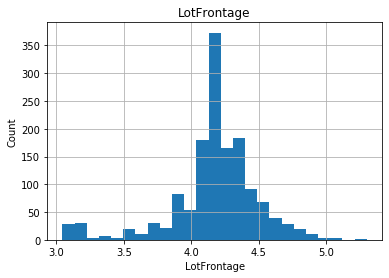

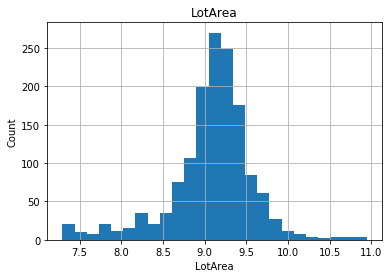

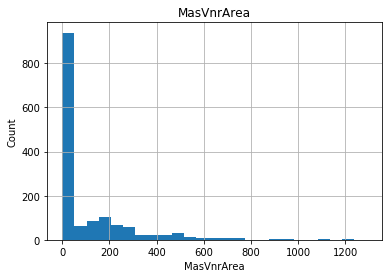

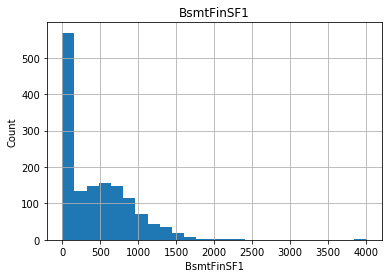

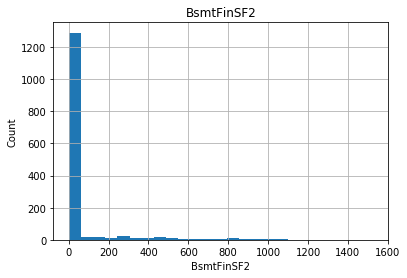

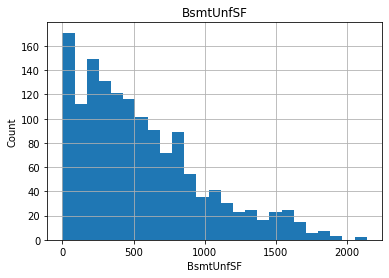

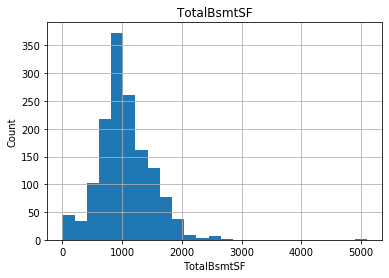

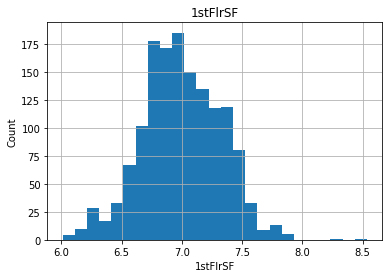

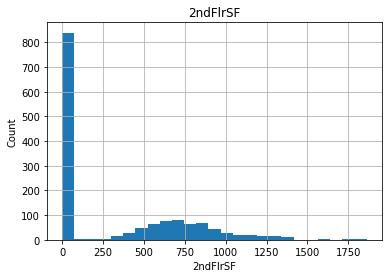

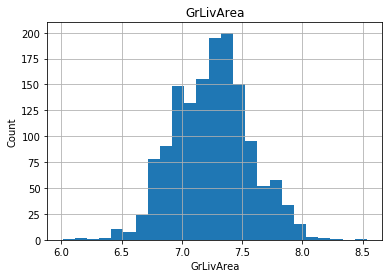

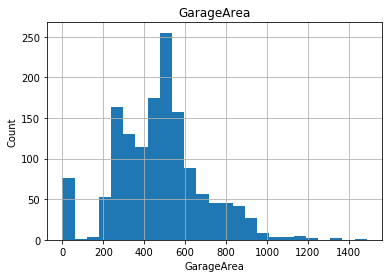

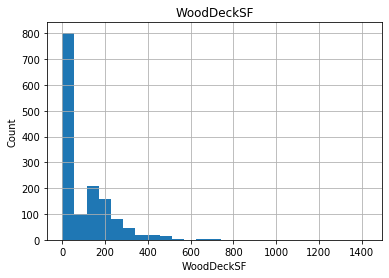

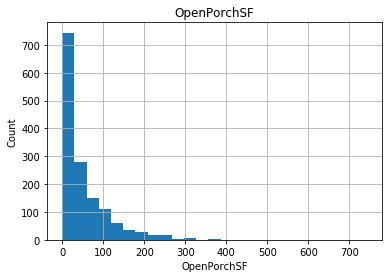

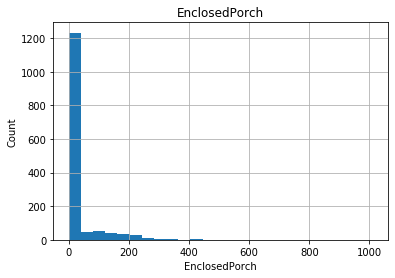

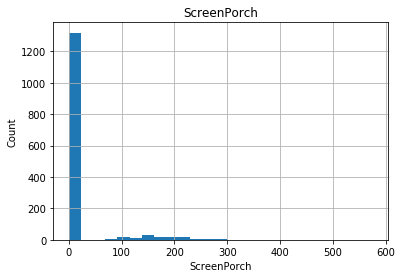

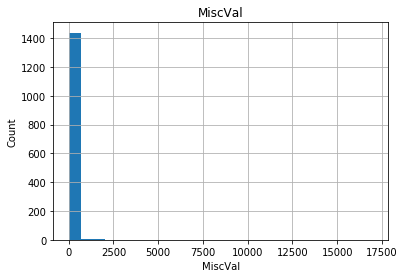

In [180]:
# checking whether all skewed values are turned into normal distribution
for feature_col in continuous_feature_col:
    data= house_test_data.copy()
    data[feature_col].hist(bins=25)
    plt.xlabel(feature_col)
    plt.ylabel("Count")
    plt.title(feature_col)
    plt.show()

from the above histogram, all the skewed distributions are now converted into normal distributions which is very important to be done when using regresssion model

Now we will create a new label for all the rare categorical features from feature columns( features that are present in less than 1% of the observations). We will skip this categorical features in our model since it does not provide that much importance in the dataset.

In [181]:
categorical_feature_col =[feature_col for feature_col in house_test_data.columns if house_test_data[feature_col].dtype=='O']

In [182]:
categorical_feature_col

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [183]:
for feature_col in categorical_feature_col:
  # groupping by category that are present inside each feature column using the count of saleprice and than dividing by the len of dataset
  # to get percentage value
    temp = house_test_data.groupby(feature_col)['Id'].count()/len(house_test_data)
    # if the temporary percent > 0.01 than consider the index inside the temp variable
    temp_dframe = temp[temp>0.01].index
    # if the dataset of feature col is in the index than take the dataset else convert it into new Rare_Variable
    house_test_data[feature_col] = np.where(house_test_data[feature_col].isin(temp_dframe),house_test_data[feature_col],'Rare_Variable')

In [184]:
house_test_data.head(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontageNull,MasVnrAreaNull,BsmtFullBathNull,BsmtHalfBathNull,GarageYrBltNull
0,1461,20,Rare_Variable,4.382027,9.360655,Pave,No_Value,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,49,49,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,6.797940,0,0,6.797940,0.0,0.0,1,0,2,1,TA,5,Typ,0,No_Value,Attchd,49.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,No_Value,MnPrv,No_Value,0,6,2010,WD,Normal,0,0,0,0,0
1,1462,20,RL,4.394449,9.565704,Pave,No_Value,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,52,52,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,7.192182,0,0,7.192182,0.0,0.0,1,1,3,1,Gd,6,Typ,0,No_Value,Attchd,52.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,No_Value,No_Value,Rare_Variable,12500,6,2010,WD,Normal,0,0,0,0,0
2,1463,60,RL,4.304065,9.534595,Pave,No_Value,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,13,12,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,6.833032,701,0,7.395722,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,13.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,No_Value,MnPrv,No_Value,0,3,2010,WD,Normal,0,0,0,0,0
3,1464,60,RL,4.356709,9.208138,Pave,No_Value,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,12,12,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,6.830874,678,0,7.380256,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,12.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,No_Value,No_Value,No_Value,0,6,2010,WD,Normal,0,0,0,0,0
4,1465,120,RL,3.761200,8.518193,Pave,No_Value,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,18,18,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,7.154615,0,0,7.154615,0.0,0.0,2,0,2,1,Gd,5,Typ,0,No_Value,Attchd,18.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,No_Value,No_Value,No_Value,0,1,2010,WD,Normal,0,0,0,0,0
5,1466,60,RL,4.317488,9.210340,Pave,No_Value,IR1,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,17,16,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,763.0,763.0,GasA,Gd,Y,SBrkr,6.637258,892,0,7.411556,0.0,0.0,2,1,3,1,TA,7,Typ,1,TA,Attchd,17.0,Fin,2.0,440.0,TA,TA,Y,157,84,0,0,0,0,No_Value,No_Value,No_Value,0,4,2010,WD,Normal,0,0,0,0,0
6,1467,20,RL,4.204693,8.984694,Pave,No_Value,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,1Story,6,7,18,3,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,Gd,PConc,Gd,TA,No,ALQ,935.0,Unf,0.0,233.0,1168.0,GasA,Ex,Y,SBrkr,7.079184,0,0,7.079184,1.0,0.0,2,0,3,1,TA,6,Typ,0,No_Value,Attchd,18.0,Fin,2.0,420.0,TA,TA,Y,483,21,0,0,0,0,No_Value,GdPrv,Shed,500,3,2010,WD,Normal,1,0,0,0,0
7,1468,60,RL,4.143135,9.036225,Pave,No_Value,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,12,12,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,789.0,789.0,GasA,Gd,Y,SBrkr,6.670766,676,0,7.289611,0.0,0.0,2,1,3,1,TA,7,Typ,1,Gd,Attchd,12.0,Fin,2.0,393.0,TA,TA,Y,0,75,0,0,0,0,No_Value,No_Value,No_Value,0,5,2010,WD,Normal,0,0,0,0,0
8,1469,20,RL,4.442651,9.227787,

# Feature Scaling

Since in our data, there are different types of columns which has different measurements and units so it is very important to apply feature scaling so that we can apply ml techniques in a good way

In [185]:
from sklearn.preprocessing import MinMaxScaler

Now we will not use Id since we will be dropping that column and SalePrice is our dependent feature so we will also skip that from scalable feature

In [186]:
for feature_col in categorical_feature_col:
    ordered_labels = house_test_data.groupby([feature_col])['Id'].mean().sort_values().index
    ordered_labels = {k:i for i,k in enumerate(ordered_labels,0)}
    house_test_data[feature_col] = house_test_data[feature_col].map(ordered_labels)

In [187]:
scalable_feature = [feature_col for feature_col in house_test_data.columns if feature_col not in ['Id','SalePrice'] ]


In [188]:
scalable_feature

['MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'Enc

In [189]:
scaler = MinMaxScaler()
scaler.fit(house_test_data[scalable_feature])

MinMaxScaler()

In [190]:
scaler.transform(house_test_data[scalable_feature])

array([[0.        , 0.25      , 0.59344538, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.5       , 0.59895721, ..., 0.        , 0.        ,
        0.        ],
       [0.23529412, 0.5       , 0.55885415, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.5       , 0.90099208, ..., 0.        , 0.        ,
        0.        ],
       [0.38235294, 0.5       , 0.48035069, ..., 0.        , 0.        ,
        1.        ],
       [0.23529412, 0.5       , 0.55885415, ..., 0.        , 0.        ,
        0.        ]])

from above we can see that we are getting an array from the transform method so we need to convert it into a dataframe, and we will also append and Id and SalePrice columns to it.

In [191]:
# creating a dataframe of scalable feature columns , and appending id and saleprice to it
house_test_data = pd.concat([house_test_data[['Id']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(house_test_data[scalable_feature]), columns=scalable_feature)],
                    axis=1)

In [192]:
house_test_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontageNull,MasVnrAreaNull,BsmtFullBathNull,BsmtHalfBathNull,GarageYrBltNull
0,1461,0.000000,0.25,0.593445,0.566360,1.0,0.5,0.666667,0.000000,1.0,0.50,0.5,0.45,0.666667,0.0,0.75,0.0,0.444444,0.625,0.384615,0.822581,0.5,0.0,0.0,0.181818,0.50,0.000000,1.000000,0.333333,0.25,0.75,0.25,0.00,0.333333,0.116708,0.000000,0.094364,0.126168,0.173111,1.0,0.25,0.0,0.0,0.312253,0.000000,0.0,0.312253,0.000000,0.0,0.25,0.0,0.333333,0.5,0.75,0.166667,0.0,0.00,0.6,0.333333,0.792994,0.666667,0.2,0.490591,0.333333,0.000000,0.5,0.098315,0.000000,0.0,0.0,0.208333,0.0,0.0,1.0,0.5,0.000000,0.454545,1.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0
1,1462,0.000000,0.50,0.598957,0.622527,1.0,0.5,0.333333,0.000000,1.0,0.25,0.5,0.45,0.500000,0.0,0.75,0.0,0.555556,0.625,0.407692,0.870968,0.0,0.0,0.5,0.636364,0.25,0.083721,1.000000,0.333333,0.25,0.75,0.25,0.00,0.500000,0.230175,0.666667,0.000000,0.189720,0.260844,1.0,0.25,0.0,0.0,0.468253,0.000000,0.0,0.468253,0.000000,0.0,0.25,0.5,0.500000,0.5,0.50,0.250000,0.0,0.00,0.6,0.333333,0.802548,0.666667,0.2,0.209677,0.333333,0.000000,0.5,0.275983,0.048518,0.0,0.0,0.000000,0.0,0.0,0.5,1.0,0.735294,0.454545,1.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0
2,1463,0.235294,0.50,0.558854,0.614005,1.0,0.5,0.333333,0.000000,1.0,0.50,0.5,0.00,0.500000,0.0,0.75,0.2,0.444444,0.500,0.107692,0.225806,0.5,0.0,0.0,0.181818,0.50,0.000000,1.000000,0.333333,0.00,0.25,0.25,0.00,0.000000,0.197257,0.666667,0.000000,0.064019,0.182139,1.0,0.75,0.0,0.0,0.326139,0.376477,0.0,0.548792,0.000000,0.0,0.50,0.5,0.500000,0.5,0.75,0.250000,0.0,0.25,0.2,0.333333,0.678344,0.000000,0.4,0.323925,0.333333,0.000000,0.5,0.148876,0.045822,0.0,0.0,0.000000,0.0,0.0,1.0,0.5,0.000000,0.181818,1.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0
3,1464,0.235294,0.50,0.582212,0.524583,1.0,0.5,0.333333,0.000000,1.0,0.50,0.5,0.00,0.500000,0.0,0.75,0.2,0.555556,0.625,0.100000,0.225806,0.5,0.0,0.0,0.181818,0.25,0.015504,1.000000,0.333333,0.00,0.75,0.25,0.00,0.000000,0.150125,0.666667,0.000000,0.151402,0.181747,1.0,0.00,0.0,0.0,0.325285,0.364125,0.0,0.542672,0.000000,0.0,0.50,0.5,0.500000,0.5,0.50,0.333333,0.0,0.25,0.0,0.333333,0.675159,0.000000,0.4,0.315860,0.333333,0.000000,0.5,0.252809,0.048518,0.0,0.0,0.000000,0.0,0.0,0.5,0.5,0.000000,0.454545,1.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0
4,1465,0.588235,0.50,0.317987,0.335596,1.0,0.5,0.333333,0.666667,1.0,0.50,0.5,0.55,0.500000,0.0,0.00,0.0,0.777778,0.500,0.146154,0.322581,0.5,0.0,0.3,0.272727,0.50,0.000000,0.666667,0.333333,0.00,0.25,0.25,0.00,0.500000,0.065586,0.666667,0.000000,0.475234,0.251227,1.0,0.00,0.0,0.0,0.453388,0.000000,0.0,0.453388,0.000000,0.0,0.50,0.0,0.333333,0.5,0.50,0.166667,0.0,0.00,0.6,0.333333,0.694268,0.333333,0.4,0.340054,0.333333,0.000000,0.5,0.000000,0.110512,0.0,0.0,0.250000,0.0,0.0,0.5,0.5,0.000000,0.000000,1.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,0.823529,0.75,0.000000,0.0754

Now our data is ready to be fed in to a model, as we can see after feature engineering our dataset looks much better.

In [193]:
house_test_data.to_csv('FE_test_orig.csv',index=False)


In [194]:
df_Train=pd.read_csv('FE_train_orig.csv')
df_Test=pd.read_csv('FE_test_orig.csv')

In [195]:
X_train= df_Train.drop(['SalePrice'],axis=1)
y_train= df_Train['SalePrice']

In [196]:
X_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontageNull,MasVnrAreaNull,GarageYrBltNull
0,1,0.235294,0.75,0.418208,0.366344,1.0,1.0,0.000000,0.333333,1.0,0.00,0.0,0.636364,0.4,1.0,0.75,1.0,0.666667,0.500,0.036765,0.098361,0.0,0.0,1.0,1.0,0.50,0.122500,0.666667,1.000000,1.00,0.75,0.75,0.25,1.000000,0.125089,0.833333,0.000000,0.064212,0.140098,1.0,1.00,1.0,1.000000,0.356155,0.413559,0.0,0.577712,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.500000,1.00,0.000000,0.2,0.8,0.046729,0.666667,0.50,0.386460,0.666667,1.0,1.0,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.0,1.00,1.0,0.00000,0.090909,0.50,0.666667,0.75,0.0,0.0,0.0
1,2,0.000000,0.75,0.495064,0.391317,1.0,1.0,0.000000,0.333333,1.0,0.50,0.0,0.500000,0.2,1.0,0.75,0.6,0.555556,0.875,0.227941,0.524590,0.0,0.0,0.4,0.3,0.25,0.000000,0.333333,1.000000,0.50,0.75,0.75,1.00,0.666667,0.173281,0.833333,0.000000,0.121575,0.206547,1.0,1.00,1.0,1.000000,0.503056,0.000000,0.0,0.470245,0.000000,0.5,0.666667,0.0,0.375,0.333333,0.333333,0.333333,1.00,0.333333,0.6,0.8,0.289720,0.666667,0.50,0.324401,0.666667,1.0,1.0,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.0,1.00,1.0,0.00000,0.363636,0.25,0.666667,0.75,0.0,0.0,0.0
2,3,0.235294,0.75,0.434909,0.422359,1.0,1.0,0.333333,0.333333,1.0,0.00,0.0,0.636364,0.4,1.0,0.75,1.0,0.666667,0.500,0.051471,0.114754,0.0,0.0,1.0,1.0,0.50,0.101250,0.666667,1.000000,1.00,0.75,0.75,0.50,1.000000,0.086109,0.833333,0.000000,0.185788,0.150573,1.0,1.00,1.0,1.000000,0.383441,0.419370,0.0,0.593095,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.333333,1.00,0.333333,0.6,0.8,0.065421,0.666667,0.50,0.428773,0.666667,1.0,1.0,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.0,1.00,1.0,0.00000,0.727273,0.50,0.666667,0.75,0.0,0.0,0.0
3,4,0.294118,0.75,0.388581,0.390295,1.0,1.0,0.333333,0.333333,1.0,0.25,0.0,0.727273,0.4,1.0,0.75,1.0,0.666667,0.500,0.669118,0.606557,0.0,0.0,0.2,0.4,0.25,0.000000,0.333333,1.000000,0.25,0.50,1.00,0.25,0.666667,0.038271,0.833333,0.000000,0.231164,0.123732,1.0,0.75,1.0,1.000000,0.399941,0.366102,0.0,0.579157,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.666667,0.416667,1.00,0.333333,0.8,0.4,0.074766,0.333333,0.75,0.452750,0.666667,1.0,1.0,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.0,1.00,1.0,0.00000,0.090909,0.00,0.666667,0.00,0.0,0.0,0.0
4,5,0.235294,0.75,0.513123,0.468761,1.0,1.0,0.333333,0.333333,1.0,0.50,0.0,1.000000,0.4,1.0,0.75,1.0,0.777778,0.500,0.058824,0.147541,0.0,0.0,1.0,1.0,0.50,0.218750,0.666667,1.000000,1.00,0.75,0.75,0.75,1.000000,0.116052,0.833333,0.000000,0.209760,0.187398,1.0,1.00,1.0,1.000000,0.466237,0.509927,0.0,0.666523,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.666667,0.583333,1.00,0.333333,0.6,0.8,0.074766,0.666667,0.75,0.589563,0.666667,1.0,1.0,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.0,1.00,1.0,0.00000,1.000000,0.50,0.666667,0.75,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,0.235294,0.75,0.400718,0.353592,1.0,1.0,0.000000,0.333333,1.0,0.00

In [197]:
X_train= X_train.drop(['LotFrontageNull'],axis=1)
X_train= X_train.drop(['MasVnrAreaNull'],axis=1)
X_train= X_train.drop(['GarageYrBltNull'],axis=1)


In [198]:
X_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,0.235294,0.75,0.418208,0.366344,1.0,1.0,0.000000,0.333333,1.0,0.00,0.0,0.636364,0.4,1.0,0.75,1.0,0.666667,0.500,0.036765,0.098361,0.0,0.0,1.0,1.0,0.50,0.122500,0.666667,1.000000,1.00,0.75,0.75,0.25,1.000000,0.125089,0.833333,0.000000,0.064212,0.140098,1.0,1.00,1.0,1.000000,0.356155,0.413559,0.0,0.577712,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.500000,1.00,0.000000,0.2,0.8,0.046729,0.666667,0.50,0.386460,0.666667,1.0,1.0,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.0,1.00,1.0,0.00000,0.090909,0.50,0.666667,0.75
1,2,0.000000,0.75,0.495064,0.391317,1.0,1.0,0.000000,0.333333,1.0,0.50,0.0,0.500000,0.2,1.0,0.75,0.6,0.555556,0.875,0.227941,0.524590,0.0,0.0,0.4,0.3,0.25,0.000000,0.333333,1.000000,0.50,0.75,0.75,1.00,0.666667,0.173281,0.833333,0.000000,0.121575,0.206547,1.0,1.00,1.0,1.000000,0.503056,0.000000,0.0,0.470245,0.000000,0.5,0.666667,0.0,0.375,0.333333,0.333333,0.333333,1.00,0.333333,0.6,0.8,0.289720,0.666667,0.50,0.324401,0.666667,1.0,1.0,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.0,1.00,1.0,0.00000,0.363636,0.25,0.666667,0.75
2,3,0.235294,0.75,0.434909,0.422359,1.0,1.0,0.333333,0.333333,1.0,0.00,0.0,0.636364,0.4,1.0,0.75,1.0,0.666667,0.500,0.051471,0.114754,0.0,0.0,1.0,1.0,0.50,0.101250,0.666667,1.000000,1.00,0.75,0.75,0.50,1.000000,0.086109,0.833333,0.000000,0.185788,0.150573,1.0,1.00,1.0,1.000000,0.383441,0.419370,0.0,0.593095,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.333333,1.00,0.333333,0.6,0.8,0.065421,0.666667,0.50,0.428773,0.666667,1.0,1.0,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.0,1.00,1.0,0.00000,0.727273,0.50,0.666667,0.75
3,4,0.294118,0.75,0.388581,0.390295,1.0,1.0,0.333333,0.333333,1.0,0.25,0.0,0.727273,0.4,1.0,0.75,1.0,0.666667,0.500,0.669118,0.606557,0.0,0.0,0.2,0.4,0.25,0.000000,0.333333,1.000000,0.25,0.50,1.00,0.25,0.666667,0.038271,0.833333,0.000000,0.231164,0.123732,1.0,0.75,1.0,1.000000,0.399941,0.366102,0.0,0.579157,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.666667,0.416667,1.00,0.333333,0.8,0.4,0.074766,0.333333,0.75,0.452750,0.666667,1.0,1.0,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.0,1.00,1.0,0.00000,0.090909,0.00,0.666667,0.00
4,5,0.235294,0.75,0.513123,0.468761,1.0,1.0,0.333333,0.333333,1.0,0.50,0.0,1.000000,0.4,1.0,0.75,1.0,0.777778,0.500,0.058824,0.147541,0.0,0.0,1.0,1.0,0.50,0.218750,0.666667,1.000000,1.00,0.75,0.75,0.75,1.000000,0.116052,0.833333,0.000000,0.209760,0.187398,1.0,1.00,1.0,1.000000,0.466237,0.509927,0.0,0.666523,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.666667,0.583333,1.00,0.333333,0.6,0.8,0.074766,0.666667,0.75,0.589563,0.666667,1.0,1.0,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.0,1.00,1.0,0.00000,1.000000,0.50,0.666667,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,0.235294,0.75,0.400718,0.353592,1.0,1.0,0.000000,0.333333,1.0,0.00,0.0,0.590909,0.4,1.0,0.75,1.0,0.555556,0.500,0.058824,0.131148,0.0,0.0,1.0,1.0,0.25,0.000000,0.333333,1.000000,1.00,0.

In [199]:
from sklearn.ensemble import RandomForestRegressor


In [200]:
model = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=30,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=5,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False )

model.fit(X_train,y_train)

RandomForestRegressor(max_depth=30, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=5, n_estimators=200, n_jobs=1)

In [201]:
df_Test.columns[df_Test.isna().any()].tolist()

['BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'GarageCars',
 'GarageArea']

In [202]:
df_Test['BsmtFinSF1'].fillna((df_Test['BsmtFinSF1'].median()), inplace=True)
df_Test['BsmtFinSF2'].fillna((df_Test['BsmtFinSF2'].median()), inplace=True)
df_Test['BsmtUnfSF'].fillna((df_Test['BsmtUnfSF'].median()), inplace=True)
df_Test['TotalBsmtSF'].fillna((df_Test['TotalBsmtSF'].median()), inplace=True)
df_Test['GarageCars'].fillna((df_Test['GarageCars'].median()), inplace=True)
df_Test['GarageArea'].fillna((df_Test['GarageArea'].median()), inplace=True)

In [203]:
df_Test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontageNull,MasVnrAreaNull,BsmtFullBathNull,BsmtHalfBathNull,GarageYrBltNull
0,1461,0.000000,0.25,0.593445,0.566360,1.0,0.5,0.666667,0.000000,1.0,0.50,0.5,0.45,0.666667,0.0,0.75,0.0,0.444444,0.625,0.384615,0.822581,0.5,0.0,0.0,0.181818,0.50,0.000000,1.000000,0.333333,0.25,0.75,0.25,0.00,0.333333,0.116708,0.000000,0.094364,0.126168,0.173111,1.0,0.25,0.0,0.0,0.312253,0.000000,0.0,0.312253,0.000000,0.0,0.25,0.0,0.333333,0.5,0.75,0.166667,0.0,0.00,0.6,0.333333,0.792994,0.666667,0.2,0.490591,0.333333,0.000000,0.5,0.098315,0.000000,0.0,0.0,0.208333,0.0,0.0,1.0,0.5,0.000000,0.454545,1.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0
1,1462,0.000000,0.50,0.598957,0.622527,1.0,0.5,0.333333,0.000000,1.0,0.25,0.5,0.45,0.500000,0.0,0.75,0.0,0.555556,0.625,0.407692,0.870968,0.0,0.0,0.5,0.636364,0.25,0.083721,1.000000,0.333333,0.25,0.75,0.25,0.00,0.500000,0.230175,0.666667,0.000000,0.189720,0.260844,1.0,0.25,0.0,0.0,0.468253,0.000000,0.0,0.468253,0.000000,0.0,0.25,0.5,0.500000,0.5,0.50,0.250000,0.0,0.00,0.6,0.333333,0.802548,0.666667,0.2,0.209677,0.333333,0.000000,0.5,0.275983,0.048518,0.0,0.0,0.000000,0.0,0.0,0.5,1.0,0.735294,0.454545,1.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0
2,1463,0.235294,0.50,0.558854,0.614005,1.0,0.5,0.333333,0.000000,1.0,0.50,0.5,0.00,0.500000,0.0,0.75,0.2,0.444444,0.500,0.107692,0.225806,0.5,0.0,0.0,0.181818,0.50,0.000000,1.000000,0.333333,0.00,0.25,0.25,0.00,0.000000,0.197257,0.666667,0.000000,0.064019,0.182139,1.0,0.75,0.0,0.0,0.326139,0.376477,0.0,0.548792,0.000000,0.0,0.50,0.5,0.500000,0.5,0.75,0.250000,0.0,0.25,0.2,0.333333,0.678344,0.000000,0.4,0.323925,0.333333,0.000000,0.5,0.148876,0.045822,0.0,0.0,0.000000,0.0,0.0,1.0,0.5,0.000000,0.181818,1.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0
3,1464,0.235294,0.50,0.582212,0.524583,1.0,0.5,0.333333,0.000000,1.0,0.50,0.5,0.00,0.500000,0.0,0.75,0.2,0.555556,0.625,0.100000,0.225806,0.5,0.0,0.0,0.181818,0.25,0.015504,1.000000,0.333333,0.00,0.75,0.25,0.00,0.000000,0.150125,0.666667,0.000000,0.151402,0.181747,1.0,0.00,0.0,0.0,0.325285,0.364125,0.0,0.542672,0.000000,0.0,0.50,0.5,0.500000,0.5,0.50,0.333333,0.0,0.25,0.0,0.333333,0.675159,0.000000,0.4,0.315860,0.333333,0.000000,0.5,0.252809,0.048518,0.0,0.0,0.000000,0.0,0.0,0.5,0.5,0.000000,0.454545,1.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0
4,1465,0.588235,0.50,0.317987,0.335596,1.0,0.5,0.333333,0.666667,1.0,0.50,0.5,0.55,0.500000,0.0,0.00,0.0,0.777778,0.500,0.146154,0.322581,0.5,0.0,0.3,0.272727,0.50,0.000000,0.666667,0.333333,0.00,0.25,0.25,0.00,0.500000,0.065586,0.666667,0.000000,0.475234,0.251227,1.0,0.00,0.0,0.0,0.453388,0.000000,0.0,0.453388,0.000000,0.0,0.50,0.0,0.333333,0.5,0.50,0.166667,0.0,0.00,0.6,0.333333,0.694268,0.333333,0.4,0.340054,0.333333,0.000000,0.5,0.000000,0.110512,0.0,0.0,0.250000,0.0,0.0,0.5,0.5,0.000000,0.000000,1.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,0.823529,0.75,0.000000,0.0754

In [204]:
df_Test= df_Test.drop(['LotFrontageNull'],axis=1)
df_Test= df_Test.drop(['MasVnrAreaNull'],axis=1)
df_Test= df_Test.drop(['GarageYrBltNull'],axis=1)
df_Test= df_Test.drop(['BsmtFullBathNull'],axis=1)
df_Test= df_Test.drop(['BsmtHalfBathNull'],axis=1)

In [205]:
y_pred=model.predict(df_Test)

y_pred
y_pred = np.exp(y_pred)
for i in range(len(y_pred)):
  y_pred[i] = round(y_pred[i],2)

In [206]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [207]:
dict(reversed(sorted(zip(model.feature_importances_, df_Train.columns.values))))

{0.10366019546328874: 'HouseStyle',
 0.08733288295347684: 'LowQualFinSF',
 0.0791978375927028: 'LandSlope',
 0.053050949444919046: 'OverallCond',
 0.0503179578208635: 'MasVnrArea',
 0.04626543079602998: 'BsmtUnfSF',
 0.03903731364189283: 'GarageFinish',
 0.03725246919459528: 'Foundation',
 0.03707051110371949: 'Electrical',
 0.03664116518550195: 'GarageCars',
 0.03504348663857314: 'KitchenAbvGr',
 0.031026438127962398: 'BsmtHalfBath',
 0.025382715551000676: 'YearBuilt',
 0.024125340545843: 'GarageType',
 0.022590804077701646: 'Fireplaces',
 0.021576115329124693: 'LotFrontage',
 0.021191661719823767: 'GarageYrBlt',
 0.019236448774658917: '1stFlrSF',
 0.017554491163565885: 'BsmtFinType1',
 0.01613131762617581: 'KitchenQual',
 0.015054649916447095: 'Functional',
 0.014851580410371974: 'ExterCond',
 0.014375416693587379: 'FireplaceQu',
 0.011881086567459344: 'MSZoning',
 0.008699463698660396: 'OverallQual',
 0.007876892801295804: 'MSSubClass',
 0.007594220067705993: 'WoodDeckSF',
 0.007217

In [208]:
import matplotlib.pyplot as plt

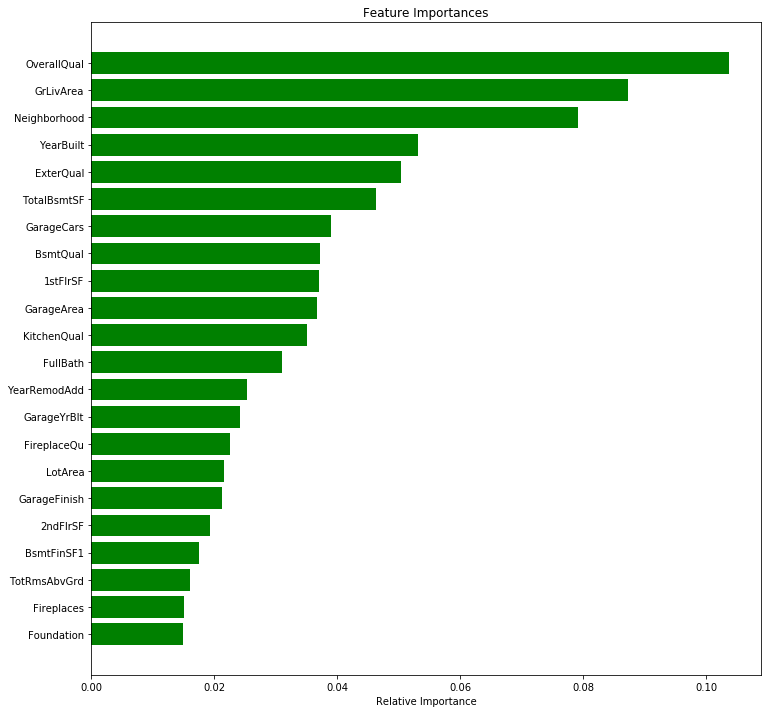

In [209]:
features = X_train.columns
importances = model.feature_importances_
plt.figure(figsize=(12,12))
plt.title('Feature Importances')
indices = np.argsort(importances)[-22:]  # top 20 features
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


In [210]:

[features[i] for i in indices]

['Foundation',
 'Fireplaces',
 'TotRmsAbvGrd',
 'BsmtFinSF1',
 '2ndFlrSF',
 'GarageFinish',
 'LotArea',
 'FireplaceQu',
 'GarageYrBlt',
 'YearRemodAdd',
 'FullBath',
 'KitchenQual',
 'GarageArea',
 '1stFlrSF',
 'BsmtQual',
 'GarageCars',
 'TotalBsmtSF',
 'ExterQual',
 'YearBuilt',
 'Neighborhood',
 'GrLivArea',
 'OverallQual']

In [211]:
imp_feature_list = [features[i] for i in indices]

In [212]:
imp_feature_list

['Foundation',
 'Fireplaces',
 'TotRmsAbvGrd',
 'BsmtFinSF1',
 '2ndFlrSF',
 'GarageFinish',
 'LotArea',
 'FireplaceQu',
 'GarageYrBlt',
 'YearRemodAdd',
 'FullBath',
 'KitchenQual',
 'GarageArea',
 '1stFlrSF',
 'BsmtQual',
 'GarageCars',
 'TotalBsmtSF',
 'ExterQual',
 'YearBuilt',
 'Neighborhood',
 'GrLivArea',
 'OverallQual']

# From above we find top 20 important features and than the next step will be to perfrom pca on the rest of the feature columns than both the PCA features and the important features will be combined into new dataframe.

In [213]:
X_train_main = df_Train[imp_feature_list]

In [214]:
df_Test_main = df_Test[imp_feature_list]

In [215]:
X_train = X_train.drop(imp_feature_list,axis=1)


In [216]:
X_train= X_train.drop(['Id'],axis=1)

In [217]:
X_train

,MSSubClass,MSZoning,LotFrontage,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Condition1,Condition2,BldgType,HouseStyle,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterCond,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,BsmtFullBath,BsmtHalfBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Functional,GarageType,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0.235294,0.75,0.418208,1.0,1.0,0.000000,0.333333,1.0,0.00,0.0,0.4,1.0,0.75,1.0,0.500,0.0,0.0,1.0,1.0,0.50,0.122500,1.000000,0.75,0.25,1.000000,0.833333,0.000000,0.064212,1.0,1.00,1.0,1.000000,0.0,0.333333,0.0,0.5,0.375,0.333333,1.00,0.8,0.666667,1.0,1.0,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.0,1.00,1.0,0.00000,0.090909,0.50,0.666667,0.75
1,0.000000,0.75,0.495064,1.0,1.0,0.000000,0.333333,1.0,0.50,0.0,0.2,1.0,0.75,0.6,0.875,0.0,0.0,0.4,0.3,0.25,0.000000,1.000000,0.75,1.00,0.666667,0.833333,0.000000,0.121575,1.0,1.00,1.0,1.000000,0.0,0.000000,0.5,0.0,0.375,0.333333,1.00,0.8,0.666667,1.0,1.0,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.0,1.00,1.0,0.00000,0.363636,0.25,0.666667,0.75
2,0.235294,0.75,0.434909,1.0,1.0,0.333333,0.333333,1.0,0.00,0.0,0.4,1.0,0.75,1.0,0.500,0.0,0.0,1.0,1.0,0.50,0.101250,1.000000,0.75,0.50,1.000000,0.833333,0.000000,0.185788,1.0,1.00,1.0,1.000000,0.0,0.333333,0.0,0.5,0.375,0.333333,1.00,0.8,0.666667,1.0,1.0,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.0,1.00,1.0,0.00000,0.727273,0.50,0.666667,0.75
3,0.294118,0.75,0.388581,1.0,1.0,0.333333,0.333333,1.0,0.25,0.0,0.4,1.0,0.75,1.0,0.500,0.0,0.0,0.2,0.4,0.25,0.000000,1.000000,1.00,0.25,0.666667,0.833333,0.000000,0.231164,1.0,0.75,1.0,1.000000,0.0,0.333333,0.0,0.0,0.375,0.333333,1.00,0.4,0.666667,1.0,1.0,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.0,1.00,1.0,0.00000,0.090909,0.00,0.666667,0.00
4,0.235294,0.75,0.513123,1.0,1.0,0.333333,0.333333,1.0,0.50,0.0,0.4,1.0,0.75,1.0,0.500,0.0,0.0,1.0,1.0,0.50,0.218750,1.000000,0.75,0.75,1.000000,0.833333,0.000000,0.209760,1.0,1.00,1.0,1.000000,0.0,0.333333,0.0,0.5,0.500,0.333333,1.00,0.8,0.666667,1.0,1.0,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.0,1.00,1.0,0.00000,1.000000,0.50,0.666667,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.235294,0.75,0.400718,1.0,1.0,0.000000,0.333333,1.0,0.00,0.0,0.4,1.0,0.75,1.0,0.500,0.0,0.0,1.0,1.0,0.25,0.000000,1.000000,0.75,0.25,0.833333,0.833333,0.000000,0.407962,1.0,1.00,1.0,1.000000,0.0,0.000000,0.0,0.5,0.375,0.333333,1.00,0.8,0.666667,1.0,1.0,0.000000,0.073126,0.000000,0.0,0.0,0.0,0.0,1.00,1.0,0.00000,0.636364,0.25,0.666667,0.75
1456,0.000000,0.75,0.517503,1.0,1.0,0.000000,0.333333,1.0,0.00,0.0,0.4,1.0,0.75,0.6,0.625,0.0,0.0,0.7,0.7,1.00,0.074375,1.000000,0.75,0.25,0.666667,0.333333,0.110583,0.252140,1.0,0.50,1.0,1.000000,0.0,0.333333,0.0,0.0,0.375,0.333333,0.75,0.8,0.666667,1.0,1.0,0.407235,0.000000,0.000000,0.0,0.0,0.0,0.0,0.50,1.0,0.00000,0.090909,1.00,0.666667,0.75
1457,0.294118,0.75,0.423859,1.0,1.0,0.000000,0.333333,1.0,0.00,0.0,0.4,1.0,0.75,1.0,1.000,0.0,0.0,0.9,0.9,0.25,0.000000,0.666667,1.00,0.25,1.000000,0.833333,0.000000,0.375428,1.0,1.00,1.0,1.000000,0.0,0.000000,0.0,0.0,0.500,0.333333,1.00,0.8,0.666667,1.0,1.0,0.000000,0.109689,0.000000,0.0,0.0,0.0,0.0,0.75,0.5,0.16129,0.363636,1.00,0.666667,0.75
1458,0.000000,0.75,0.434909,1.0,1.0,0.000000,0.333333,1.0,0.00,0.0,0.4,1.0,0.75,0.6,0.625,1.0,0.0,0.4,0.3,0.25,0.000000,1.000000,0.75,0.50,1.000000,0.333333,0.698100,0.000000,1.0,0.75,1.0,0.666667,0.0,0.333333,0.0,0.0,0.250,0.333333,1.00,0.8,0.666667,1.0,1.0,0.427071,0.000000,0.202899,0.0,0.0,0.0,0.0,1.00,1.0,0.00000,0.272727,1.00,0.666667,0.75


# Performing PCA for train and test data

we transformed the remaing columns into 28 columns after pca. This is just an arbitrary value we choose for our model 

In [218]:
from sklearn.decomposition import PCA
pca = PCA(n_components= 28)
x_pca = pca.fit_transform(X_train)
x_pca = pd.DataFrame(x_pca)
x_pca.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,-0.648858,-0.368753,0.034328,0.152081,0.313885,0.071258,-0.136875,0.070587,-0.104189,0.279046,0.275057,-0.109108,0.034464,0.015116,0.049439,-0.236475,0.126489,0.067869,-0.132139,-0.015951,0.062085,-0.125305,0.001569,-0.054189,0.092807,0.042944,-0.055689,-0.035284
1,0.089574,0.084302,-0.438785,-0.240116,-0.378815,-0.421893,0.207569,-0.076596,0.086000,0.077243,0.197735,0.015973,-0.076825,0.083233,0.076190,0.118396,-0.128321,-0.097010,-0.188405,-0.450000,-0.148715,0.054028,-0.055411,0.207841,-0.118399,-0.002709,0.117458,0.324557
2,-0.734133,-0.325034,0.002794,-0.034805,0.208756,-0.033934,0.002603,0.040339,-0.111806,-0.250636,-0.032996,0.027628,0.108989,0.106438,0.018167,-0.144508,0.040991,0.072137,-0.020520,0.112445,-0.021202,-0.110847,-0.024321,-0.071650,-0.014513,0.035596,-0.107667,-0.131673
3,0.402937,-0.122829,-0.348657,-0.375606,0.116466,-0.102649,0.214810,-0.073774,-0.163550,0.598806,0.044487,-0.055701,0.439225,-0.071994,0.344987,-0.118918,-0.185063,-0.179575,-0.200882,0.107728,-0.062398,-0.092547,-0.033623,-0.209379,-0.001116,0.081250,-0.152347,-0.058421
4,-0.842719,-0.240767,-0.044564,-0.134519,0.131634,-0.209220,0.387150,-0.023056,-0.069317,-0.428615,-0.261724,0.075370,0.014416,0.054348,0.064010,-0.085909,0.103837,0.115813,-0.076584,-0.110484,-0.025537,0.001521,0.016308,0.006822,-0.119824,0.079505,0.001416,-0.113255


In [219]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.15929066, 0.08252308, 0.06232162, 0.05542534, 0.04938935,
       0.04753691, 0.04040706, 0.03487092, 0.02941502, 0.02842994,
       0.02711697, 0.02579631, 0.02313348, 0.02164153, 0.0195664 ,
       0.01873506, 0.0171155 , 0.01627597, 0.0157511 , 0.0148841 ,
       0.01409863, 0.01367985, 0.01269453, 0.01208574, 0.01077162,
       0.01023727, 0.00931252, 0.0087341 ])

In [220]:
np.cumsum(pca.explained_variance_ratio_)

array([0.15929066, 0.24181373, 0.30413535, 0.35956069, 0.40895003,
       0.45648695, 0.496894  , 0.53176493, 0.56117995, 0.58960989,
       0.61672686, 0.64252317, 0.66565665, 0.68729818, 0.70686457,
       0.72559963, 0.74271513, 0.7589911 , 0.77474219, 0.7896263 ,
       0.80372492, 0.81740478, 0.8300993 , 0.84218504, 0.85295666,
       0.86319393, 0.87250645, 0.88124056])

In [221]:
x_pca.columns = ['PC1','PC2','PC3','PC4','PC5','PC6',
                 'PC7','PC8','PC9','PC10','PC11','PC12',
                 'PC13','PC14','PC15','PC16','PC17','PC18',
                 'PC19','PC20','PC21','PC22','PC23','PC24',
                 'PC25','PC26','PC27','PC28']

In [222]:
x_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28
0,-0.648858,-0.368753,0.034328,0.152081,0.313885,0.071258,-0.136875,0.070587,-0.104189,0.279046,0.275057,-0.109108,0.034464,0.015116,0.049439,-0.236475,0.126489,0.067869,-0.132139,-0.015951,0.062085,-0.125305,0.001569,-0.054189,0.092807,0.042944,-0.055689,-0.035284
1,0.089574,0.084302,-0.438785,-0.240116,-0.378815,-0.421893,0.207569,-0.076596,0.086000,0.077243,0.197735,0.015973,-0.076825,0.083233,0.076190,0.118396,-0.128321,-0.097010,-0.188405,-0.450000,-0.148715,0.054028,-0.055411,0.207841,-0.118399,-0.002709,0.117458,0.324557
2,-0.734133,-0.325034,0.002794,-0.034805,0.208756,-0.033934,0.002603,0.040339,-0.111806,-0.250636,-0.032996,0.027628,0.108989,0.106438,0.018167,-0.144508,0.040991,0.072137,-0.020520,0.112445,-0.021202,-0.110847,-0.024321,-0.071650,-0.014513,0.035596,-0.107667,-0.131673
3,0.402937,-0.122829,-0.348657,-0.375606,0.116466,-0.102649,0.214810,-0.073774,-0.163550,0.598806,0.044487,-0.055701,0.439225,-0.071994,0.344987,-0.118918,-0.185063,-0.179575,-0.200882,0.107728,-0.062398,-0.092547,-0.033623,-0.209379,-0.001116,0.081250,-0.152347,-0.058421
4,-0.842719,-0.240767,-0.044564,-0.134519,0.131634,-0.209220,0.387150,-0.023056,-0.069317,-0.428615,-0.261724,0.075370,0.014416,0.054348,0.064010,-0.085909,0.103837,0.115813,-0.076584,-0.110484,-0.025537,0.001521,0.016308,0.006822,-0.119824,0.079505,0.001416,-0.113255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.563478,-0.396734,-0.015700,-0.194056,0.259457,0.349499,-0.172136,-0.117968,-0.125174,-0.023431,-0.064499,0.023055,0.103552,0.103472,-0.094325,-0.016908,-0.035316,-0.023824,0.020917,-0.190889,-0.037727,0.013623,-0.028542,-0.013195,0.055887,0.014661,-0.040824,-0.058622
1456,-0.050552,0.031263,-0.166923,0.796241,-0.206061,0.103931,-0.145406,0.224349,-0.003060,-0.048612,0.243295,-0.315319,-0.188326,-0.371520,0.366102,-0.111687,0.177014,-0.068250,0.018406,0.243503,0.383911,0.176938,0.049255,0.132563,-0.047483,0.081455,0.205475,0.115084
1457,-0.380397,-0.320578,0.037490,0.571937,0.128807,-0.039208,-0.264272,-0.147533,-0.215031,0.066368,-0.161270,-0.103386,-0.137510,0.103039,-0.044684,-0.037333,-0.305947,-0.346337,-0.026624,-0.116307,-0.085578,-0.186737,0.212929,0.221351,-0.046865,0.048559,-0.064344,0.144258
1458,0.164419,0.903003,0.074452,0.542139,0.015864,-0.338222,-0.162382,0.129680,0.039021,0.064756,0.220359,0.045527,0.178409,0.259712,-0.102372,-0.517645,0.013619,-0.177789,-0.074094,0.003689,0.125534,0.274036,-0.073986,0.268874,-0.139953,0.030909,0.196880,-0.046209


In [223]:
feed_train = pd.concat([X_train_main,x_pca],axis=1)


In [224]:
feed_train.fillna(feed_train.median(), inplace=True)

In [225]:
feed_train

,Foundation,Fireplaces,TotRmsAbvGrd,BsmtFinSF1,2ndFlrSF,GarageFinish,LotArea,FireplaceQu,GarageYrBlt,YearRemodAdd,FullBath,KitchenQual,GarageArea,1stFlrSF,BsmtQual,GarageCars,TotalBsmtSF,ExterQual,YearBuilt,Neighborhood,GrLivArea,OverallQual,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28
0,1.00,0.000000,0.500000,0.125089,0.413559,0.666667,0.366344,0.2,0.046729,0.098361,0.666667,0.666667,0.386460,0.356155,0.75,0.50,0.140098,0.666667,0.036765,0.636364,0.577712,0.666667,-0.648858,-0.368753,0.034328,0.152081,0.313885,0.071258,-0.136875,0.070587,-0.104189,0.279046,0.275057,-0.109108,0.034464,0.015116,0.049439,-0.236475,0.126489,0.067869,-0.132139,-0.015951,0.062085,-0.125305,0.001569,-0.054189,0.092807,0.042944,-0.055689,-0.035284
1,0.50,0.333333,0.333333,0.173281,0.000000,0.666667,0.391317,0.6,0.289720,0.524590,0.666667,0.333333,0.324401,0.503056,0.75,0.50,0.206547,0.333333,0.227941,0.500000,0.470245,0.555556,0.089574,0.084302,-0.438785,-0.240116,-0.378815,-0.421893,0.207569,-0.076596,0.086000,0.077243,0.197735,0.015973,-0.076825,0.083233,0.076190,0.118396,-0.128321,-0.097010,-0.188405,-0.450000,-0.148715,0.054028,-0.055411,0.207841,-0.118399,-0.002709,0.117458,0.324557
2,1.00,0.333333,0.333333,0.086109,0.419370,0.666667,0.422359,0.6,0.065421,0.114754,0.666667,0.666667,0.428773,0.383441,0.75,0.50,0.150573,0.666667,0.051471,0.636364,0.593095,0.666667,-0.734133,-0.325034,0.002794,-0.034805,0.208756,-0.033934,0.002603,0.040339,-0.111806,-0.250636,-0.032996,0.027628,0.108989,0.106438,0.018167,-0.144508,0.040991,0.072137,-0.020520,0.112445,-0.021202,-0.110847,-0.024321,-0.071650,-0.014513,0.035596,-0.107667,-0.131673
3,0.25,0.333333,0.416667,0.038271,0.366102,0.333333,0.390295,0.8,0.074766,0.606557,0.333333,0.666667,0.452750,0.399941,0.50,0.75,0.123732,0.333333,0.669118,0.727273,0.579157,0.666667,0.402937,-0.122829,-0.348657,-0.375606,0.116466,-0.102649,0.214810,-0.073774,-0.163550,0.598806,0.044487,-0.055701,0.439225,-0.071994,0.344987,-0.118918,-0.185063,-0.179575,-0.200882,0.107728,-0.062398,-0.092547,-0.033623,-0.209379,-0.001116,0.081250,-0.152347,-0.058421
4,1.00,0.333333,0.583333,0.116052,0.509927,0.666667,0.468761,0.6,0.074766,0.147541,0.666667,0.666667,0.589563,0.466237,0.75,0.75,0.187398,0.666667,0.058824,1.000000,0.666523,0.777778,-0.842719,-0.240767,-0.044564,-0.134519,0.131634,-0.209220,0.387150,-0.023056,-0.069317,-0.428615,-0.261724,0.075370,0.014416,0.054348,0.064010,-0.085909,0.103837,0.115813,-0.076584,-0.110484,-0.025537,0.001521,0.016308,0.006822,-0.119824,0.079505,0.001416,-0.113255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1.00,0.333333,0.416667,0.000000,0.336077,0.666667,0.353592,0.6,0.074766,0.131148,0.666667,0.333333,0.324401,0.396777,0.75,0.50,0.155974,0.333333,0.058824,0.590909,0.564433,0.555556,-0.563478,-0.396734,-0.015700,-0.194056,0.259457,0.349499,-0.172136,-0.117968,-0.125174,-0.023431,-0.064499,0.023055,0.103552,0.103472,-0.094325,-0.016908,-0.035316,-0.023824,0.020917,-0.190889,-0.037727,0.013623,-0.028542,-0.013195,0.055887,0.014661,-0.040824,-0.058622
1456,0.50,0.666667,0.416667,0.139972,0.000000,0.333333,0.453273,0.6,0.299065,0.377049,0.666667,0.333333,0.352609,0.690872,0.75,0.50,0.252373,0.333333,0.235294,0.545455,0.645810,0.555556,-0.050552,0.031263,-0.166923,0.796241,-0.206061,0.103931,-0.145406,0.224349,-0.003060,-0.048612,0.243295,-0.315319,-0.188326,-0.371520,0.366102,-0.111687,0.177014,-0.068250,0.018406,0.243503,0.383911,0.176938,0.049255,0.132563,-0.047483,0.081455,0.205475,0.115084
1457,0.75,0.666667,0.583333,0.048724,0.557869,0.666667,0.379597,0.8,0.644860,0.081967,0.666667,0.666667,0.177715,0.480189,0.50,0.25,0.188543,1.000000,0.507353,0.727273,0.688669,0.666667,-0.380397,-0.320578,0.037490,0.571937,0.128807,-0.039208,-0.264272,-0.147533,-0

In [226]:
feed_train.isnull().sum()

Foundation      0
Fireplaces      0
TotRmsAbvGrd    0
BsmtFinSF1      0
2ndFlrSF        0
GarageFinish    0
LotArea         0
FireplaceQu     0
GarageYrBlt     0
YearRemodAdd    0
FullBath        0
KitchenQual     0
GarageArea      0
1stFlrSF        0
BsmtQual        0
GarageCars      0
TotalBsmtSF     0
ExterQual       0
YearBuilt       0
Neighborhood    0
GrLivArea       0
OverallQual     0
PC1             0
PC2             0
PC3             0
PC4             0
PC5             0
PC6             0
PC7             0
PC8             0
PC9             0
PC10            0
PC11            0
PC12            0
PC13            0
PC14            0
PC15            0
PC16            0
PC17            0
PC18            0
PC19            0
PC20            0
PC21            0
PC22            0
PC23            0
PC24            0
PC25            0
PC26            0
PC27            0
PC28            0
dtype: int64

In [227]:
feed_test = df_Test.drop(imp_feature_list,axis = 1)

id has no relevance so we will not use it to train on the model

In [228]:
feed_test = df_Test.drop(['Id',
 ],axis = 1)

In [229]:
feed_test

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0.000000,0.25,0.593445,0.566360,1.0,0.5,0.666667,0.000000,1.0,0.50,0.5,0.45,0.666667,0.0,0.75,0.0,0.444444,0.625,0.384615,0.822581,0.5,0.0,0.0,0.181818,0.50,0.000000,1.000000,0.333333,0.25,0.75,0.25,0.00,0.333333,0.116708,0.000000,0.094364,0.126168,0.173111,1.0,0.25,0.0,0.0,0.312253,0.000000,0.0,0.312253,0.000000,0.0,0.25,0.0,0.333333,0.5,0.75,0.166667,0.0,0.00,0.6,0.333333,0.792994,0.666667,0.2,0.490591,0.333333,0.000000,0.5,0.098315,0.000000,0.0,0.0,0.208333,0.0,0.0,1.0,0.5,0.000000,0.454545,1.0,0.5,0.0
1,0.000000,0.50,0.598957,0.622527,1.0,0.5,0.333333,0.000000,1.0,0.25,0.5,0.45,0.500000,0.0,0.75,0.0,0.555556,0.625,0.407692,0.870968,0.0,0.0,0.5,0.636364,0.25,0.083721,1.000000,0.333333,0.25,0.75,0.25,0.00,0.500000,0.230175,0.666667,0.000000,0.189720,0.260844,1.0,0.25,0.0,0.0,0.468253,0.000000,0.0,0.468253,0.000000,0.0,0.25,0.5,0.500000,0.5,0.50,0.250000,0.0,0.00,0.6,0.333333,0.802548,0.666667,0.2,0.209677,0.333333,0.000000,0.5,0.275983,0.048518,0.0,0.0,0.000000,0.0,0.0,0.5,1.0,0.735294,0.454545,1.0,0.5,0.0
2,0.235294,0.50,0.558854,0.614005,1.0,0.5,0.333333,0.000000,1.0,0.50,0.5,0.00,0.500000,0.0,0.75,0.2,0.444444,0.500,0.107692,0.225806,0.5,0.0,0.0,0.181818,0.50,0.000000,1.000000,0.333333,0.00,0.25,0.25,0.00,0.000000,0.197257,0.666667,0.000000,0.064019,0.182139,1.0,0.75,0.0,0.0,0.326139,0.376477,0.0,0.548792,0.000000,0.0,0.50,0.5,0.500000,0.5,0.75,0.250000,0.0,0.25,0.2,0.333333,0.678344,0.000000,0.4,0.323925,0.333333,0.000000,0.5,0.148876,0.045822,0.0,0.0,0.000000,0.0,0.0,1.0,0.5,0.000000,0.181818,1.0,0.5,0.0
3,0.235294,0.50,0.582212,0.524583,1.0,0.5,0.333333,0.000000,1.0,0.50,0.5,0.00,0.500000,0.0,0.75,0.2,0.555556,0.625,0.100000,0.225806,0.5,0.0,0.0,0.181818,0.25,0.015504,1.000000,0.333333,0.00,0.75,0.25,0.00,0.000000,0.150125,0.666667,0.000000,0.151402,0.181747,1.0,0.00,0.0,0.0,0.325285,0.364125,0.0,0.542672,0.000000,0.0,0.50,0.5,0.500000,0.5,0.50,0.333333,0.0,0.25,0.0,0.333333,0.675159,0.000000,0.4,0.315860,0.333333,0.000000,0.5,0.252809,0.048518,0.0,0.0,0.000000,0.0,0.0,0.5,0.5,0.000000,0.454545,1.0,0.5,0.0
4,0.588235,0.50,0.317987,0.335596,1.0,0.5,0.333333,0.666667,1.0,0.50,0.5,0.55,0.500000,0.0,0.00,0.0,0.777778,0.500,0.146154,0.322581,0.5,0.0,0.3,0.272727,0.50,0.000000,0.666667,0.333333,0.00,0.25,0.25,0.00,0.500000,0.065586,0.666667,0.000000,0.475234,0.251227,1.0,0.00,0.0,0.0,0.453388,0.000000,0.0,0.453388,0.000000,0.0,0.50,0.0,0.333333,0.5,0.50,0.166667,0.0,0.00,0.6,0.333333,0.694268,0.333333,0.4,0.340054,0.333333,0.000000,0.5,0.000000,0.110512,0.0,0.0,0.250000,0.0,0.0,0.5,0.5,0.000000,0.000000,1.0,0.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,0.823529,0.75,0.000000,0.075426,1.0,0.5,0.666667,0.000000,1.0,0.50,0.5,1.00,0.500000,0.0,0.50,0.2,0.333333,0.750,0.284615,0.612903,0.5,0.0,0.7,0.727273,0.50,0.000000,1.000000,0.333333,0.25,0.75,0.25,0.00,0.666667,0.000000,0.666667,0.000000,0.255140,0.107164,1.0,0.75,

In [230]:
pca = PCA(n_components= 28)
x_pca_test = pca.fit_transform(feed_test)
x_pca_test = pd.DataFrame(x_pca_test)
x_pca_test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0.503074,0.061367,-0.566368,-0.404778,-0.589064,0.064995,0.014648,0.028425,0.242936,-0.242025,-0.123415,-0.118143,-0.246374,-0.029103,-0.122338,-0.054243,0.080386,0.041403,0.092735,0.173385,-0.220796,0.352181,0.189333,-0.249553,0.199207,0.101873,-0.185506,-0.033657
1,0.479103,0.169802,-0.309959,-0.561837,-0.050949,-0.174896,0.300960,0.001927,-0.081950,-0.258173,0.249455,-0.162706,-0.351930,-0.071647,-0.016348,0.244374,-0.077819,0.241570,-0.220749,-0.108712,-0.142073,-0.147101,-0.009591,0.282530,-0.121715,-0.077511,-0.017382,0.166888
2,-0.509293,-0.397310,-0.684416,-0.376098,0.073623,0.094039,0.029067,0.158666,0.538371,-0.243955,0.228042,0.240691,0.342756,0.008958,-0.311211,-0.011823,0.113384,-0.189692,0.022328,-0.189043,-0.142655,0.187637,-0.176870,0.047516,0.393167,-0.076535,0.071160,0.050038
3,-0.616047,-0.397492,-0.554482,-0.484491,0.103481,0.113877,0.101921,0.066783,0.241750,-0.024118,-0.188667,-0.118326,-0.070051,-0.078502,-0.242058,-0.076382,-0.082722,-0.260352,0.128275,-0.233611,0.052227,-0.128009,-0.015048,0.276822,0.052514,0.189202,0.016774,-0.115890
4,-0.308611,-0.124591,-0.484540,0.275369,-0.307267,-0.125657,0.698610,0.058463,-0.640946,-0.092401,0.019354,0.575496,0.009514,0.050781,0.074270,-0.131105,0.049890,0.324256,0.438722,-0.011778,-0.081668,-0.033883,-0.029115,-0.054806,0.048276,0.049152,-0.105950,0.129817
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1.152114,-0.420288,0.030142,0.804222,0.321860,-0.524064,-0.179457,-0.026571,-0.411113,-0.022178,0.037588,0.201604,0.166498,0.151020,-0.215284,0.428883,0.142289,0.136769,-0.431737,-0.157179,-0.011304,0.046062,0.065708,0.048904,0.007296,0.036821,-0.015174,-0.053742
1455,0.710377,-0.246496,0.030469,1.031596,0.344449,-0.650972,-0.019119,-0.083201,-0.409242,-0.326331,-0.183520,0.346541,-0.280591,-0.015651,-0.223585,0.395283,-0.075487,-0.130144,-0.126458,-0.088251,0.109390,0.055638,0.048704,-0.010462,-0.041397,0.098209,-0.020808,0.078664
1456,0.071294,0.238913,0.422311,-0.143622,-0.311515,-0.022023,-0.541022,-0.245397,0.084945,0.053583,-0.439722,-0.263412,-0.030664,0.129157,-0.239483,0.177755,-0.076219,-0.153711,0.262070,0.217676,0.075777,-0.174456,0.174799,-0.046059,-0.011447,-0.225129,0.066466,-0.086913
1457,0.407565,0.092013,-0.029558,0.914071,0.012792,0.294980,-0.464218,-0.294819,0.104325,0.003555,-0.124578,-0.301067,0.317558,-0.098468,0.602898,-0.078904,0.517485,0.017603,-0.282574,-0.048331,-0.301107,0.142499,-0.295667,0.188716,0.405899,-0.053347,0.029967,-0.340963


In [231]:
x_pca_test.columns = ['PC1','PC2','PC3','PC4','PC5','PC6',
                 'PC7','PC8','PC9','PC10','PC11','PC12',
                 'PC13','PC14','PC15','PC16','PC17','PC18',
                 'PC19','PC20','PC21','PC22','PC23','PC24',
                 'PC25','PC26','PC27','PC28']

In [232]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.19496262, 0.05851361, 0.05318598, 0.04759876, 0.04618561,
       0.04019603, 0.03820546, 0.03187498, 0.02787407, 0.02618374,
       0.02393944, 0.0231338 , 0.02197596, 0.02133137, 0.02034247,
       0.01788489, 0.01676846, 0.01521869, 0.01382578, 0.01280555,
       0.01154963, 0.01136397, 0.01073283, 0.01037528, 0.01009966,
       0.00970193, 0.00936274, 0.00866142])

In [233]:
np.cumsum(pca.explained_variance_ratio_)

array([0.19496262, 0.25347623, 0.30666221, 0.35426097, 0.40044658,
       0.44064261, 0.47884807, 0.51072305, 0.53859712, 0.56478086,
       0.5887203 , 0.6118541 , 0.63383006, 0.65516143, 0.6755039 ,
       0.69338879, 0.71015725, 0.72537594, 0.73920172, 0.75200727,
       0.7635569 , 0.77492087, 0.78565371, 0.79602899, 0.80612865,
       0.81583058, 0.82519332, 0.83385474])

In [234]:
feed_test = pd.concat([df_Test_main,x_pca_test],axis = 1)

In [235]:
feed_test

,Foundation,Fireplaces,TotRmsAbvGrd,BsmtFinSF1,2ndFlrSF,GarageFinish,LotArea,FireplaceQu,GarageYrBlt,YearRemodAdd,FullBath,KitchenQual,GarageArea,1stFlrSF,BsmtQual,GarageCars,TotalBsmtSF,ExterQual,YearBuilt,Neighborhood,GrLivArea,OverallQual,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28
0,0.25,0.00,0.166667,0.116708,0.000000,0.666667,0.566360,0.6,0.792994,0.822581,0.25,0.75,0.490591,0.312253,0.75,0.2,0.173111,1.000000,0.384615,0.45,0.312253,0.444444,0.503074,0.061367,-0.566368,-0.404778,-0.589064,0.064995,0.014648,0.028425,0.242936,-0.242025,-0.123415,-0.118143,-0.246374,-0.029103,-0.122338,-0.054243,0.080386,0.041403,0.092735,0.173385,-0.220796,0.352181,0.189333,-0.249553,0.199207,0.101873,-0.185506,-0.033657
1,0.25,0.00,0.250000,0.230175,0.000000,0.666667,0.622527,0.6,0.802548,0.870968,0.25,0.50,0.209677,0.468253,0.75,0.2,0.260844,1.000000,0.407692,0.45,0.468253,0.555556,0.479103,0.169802,-0.309959,-0.561837,-0.050949,-0.174896,0.300960,0.001927,-0.081950,-0.258173,0.249455,-0.162706,-0.351930,-0.071647,-0.016348,0.244374,-0.077819,0.241570,-0.220749,-0.108712,-0.142073,-0.147101,-0.009591,0.282530,-0.121715,-0.077511,-0.017382,0.166888
2,0.00,0.25,0.250000,0.197257,0.376477,0.000000,0.614005,0.2,0.678344,0.225806,0.50,0.75,0.323925,0.326139,0.25,0.4,0.182139,1.000000,0.107692,0.00,0.548792,0.444444,-0.509293,-0.397310,-0.684416,-0.376098,0.073623,0.094039,0.029067,0.158666,0.538371,-0.243955,0.228042,0.240691,0.342756,0.008958,-0.311211,-0.011823,0.113384,-0.189692,0.022328,-0.189043,-0.142655,0.187637,-0.176870,0.047516,0.393167,-0.076535,0.071160,0.050038
3,0.00,0.25,0.333333,0.150125,0.364125,0.000000,0.524583,0.0,0.675159,0.225806,0.50,0.50,0.315860,0.325285,0.75,0.4,0.181747,1.000000,0.100000,0.00,0.542672,0.555556,-0.616047,-0.397492,-0.554482,-0.484491,0.103481,0.113877,0.101921,0.066783,0.241750,-0.024118,-0.188667,-0.118326,-0.070051,-0.078502,-0.242058,-0.076382,-0.082722,-0.260352,0.128275,-0.233611,0.052227,-0.128009,-0.015048,0.276822,0.052514,0.189202,0.016774,-0.115890
4,0.00,0.00,0.166667,0.065586,0.000000,0.333333,0.335596,0.6,0.694268,0.322581,0.50,0.50,0.340054,0.453388,0.25,0.4,0.251227,0.666667,0.146154,0.55,0.453388,0.777778,-0.308611,-0.124591,-0.484540,0.275369,-0.307267,-0.125657,0.698610,0.058463,-0.640946,-0.092401,0.019354,0.575496,0.009514,0.050781,0.074270,-0.131105,0.049890,0.324256,0.438722,-0.011778,-0.081668,-0.033883,-0.029115,-0.054806,0.048276,0.049152,-0.105950,0.129817
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,0.25,0.00,0.166667,0.000000,0.293233,1.000000,0.075426,0.6,0.722930,0.612903,0.25,0.75,0.000000,0.116257,0.75,0.0,0.107164,1.000000,0.284615,1.00,0.390532,0.333333,1.152114,-0.420288,0.030142,0.804222,0.321860,-0.524064,-0.179457,-0.026571,-0.411113,-0.022178,0.037588,0.201604,0.166498,0.151020,-0.215284,0.428883,0.142289,0.136769,-0.431737,-0.157179,-0.011304,0.046062,0.065708,0.048904,0.007296,0.036821,-0.015174,-0.053742
1455,0.25,0.00,0.250000,0.062843,0.293233,0.666667,0.069418,0.6,0.751592,0.612903,0.25,0.75,0.192204,0.116257,0.75,0.2,0.107164,1.000000,0.284615,1.00,0.390532,0.333333,0.710377,-0.246496,0.030469,1.031596,0.344449,-0.650972,-0.019119,-0.083201,-0.409242,-0.326331,-0.183520,0.346541,-0.280591,-0.015651,-0.223585,0.395283,-0.075487,-0.130144,-0.126458,-0.088251,0.109390,0.055638,0.048704,-0.010462,-0.041397,0.098209,-0.020808,0.078664
1456,0.25,0.25,0.333333,0.305237,0.000000,0.666667,0.715051,0.2,0.783439,0.193548,0.25,0.75,0.387097,0.435686,0.75,0.4,0.240236,1.000000,0.361538,0.70,0.435686,0.444444,0.071294,0.238913,0.422311,-0.143622,-0.311515,-0.022023,-0.541022,-0.245397,0.084945,0.053583,-0.439722,-0.263412,-0.030664,0.129157,-0.239483,0.177755,-0.076219,-0.153711,0.262070,0.217676,0.075777,-0.174456,0.17479

In [236]:
feed_test.columns[feed_test.isna().any()].tolist()

[]

In [237]:
feed_test.fillna(feed_test.median(), inplace=True)

In [238]:
feed_test.shape

(1459, 50)

In [239]:
feed_train.shape

(1460, 50)

In [240]:
feed_test

,Foundation,Fireplaces,TotRmsAbvGrd,BsmtFinSF1,2ndFlrSF,GarageFinish,LotArea,FireplaceQu,GarageYrBlt,YearRemodAdd,FullBath,KitchenQual,GarageArea,1stFlrSF,BsmtQual,GarageCars,TotalBsmtSF,ExterQual,YearBuilt,Neighborhood,GrLivArea,OverallQual,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28
0,0.25,0.00,0.166667,0.116708,0.000000,0.666667,0.566360,0.6,0.792994,0.822581,0.25,0.75,0.490591,0.312253,0.75,0.2,0.173111,1.000000,0.384615,0.45,0.312253,0.444444,0.503074,0.061367,-0.566368,-0.404778,-0.589064,0.064995,0.014648,0.028425,0.242936,-0.242025,-0.123415,-0.118143,-0.246374,-0.029103,-0.122338,-0.054243,0.080386,0.041403,0.092735,0.173385,-0.220796,0.352181,0.189333,-0.249553,0.199207,0.101873,-0.185506,-0.033657
1,0.25,0.00,0.250000,0.230175,0.000000,0.666667,0.622527,0.6,0.802548,0.870968,0.25,0.50,0.209677,0.468253,0.75,0.2,0.260844,1.000000,0.407692,0.45,0.468253,0.555556,0.479103,0.169802,-0.309959,-0.561837,-0.050949,-0.174896,0.300960,0.001927,-0.081950,-0.258173,0.249455,-0.162706,-0.351930,-0.071647,-0.016348,0.244374,-0.077819,0.241570,-0.220749,-0.108712,-0.142073,-0.147101,-0.009591,0.282530,-0.121715,-0.077511,-0.017382,0.166888
2,0.00,0.25,0.250000,0.197257,0.376477,0.000000,0.614005,0.2,0.678344,0.225806,0.50,0.75,0.323925,0.326139,0.25,0.4,0.182139,1.000000,0.107692,0.00,0.548792,0.444444,-0.509293,-0.397310,-0.684416,-0.376098,0.073623,0.094039,0.029067,0.158666,0.538371,-0.243955,0.228042,0.240691,0.342756,0.008958,-0.311211,-0.011823,0.113384,-0.189692,0.022328,-0.189043,-0.142655,0.187637,-0.176870,0.047516,0.393167,-0.076535,0.071160,0.050038
3,0.00,0.25,0.333333,0.150125,0.364125,0.000000,0.524583,0.0,0.675159,0.225806,0.50,0.50,0.315860,0.325285,0.75,0.4,0.181747,1.000000,0.100000,0.00,0.542672,0.555556,-0.616047,-0.397492,-0.554482,-0.484491,0.103481,0.113877,0.101921,0.066783,0.241750,-0.024118,-0.188667,-0.118326,-0.070051,-0.078502,-0.242058,-0.076382,-0.082722,-0.260352,0.128275,-0.233611,0.052227,-0.128009,-0.015048,0.276822,0.052514,0.189202,0.016774,-0.115890
4,0.00,0.00,0.166667,0.065586,0.000000,0.333333,0.335596,0.6,0.694268,0.322581,0.50,0.50,0.340054,0.453388,0.25,0.4,0.251227,0.666667,0.146154,0.55,0.453388,0.777778,-0.308611,-0.124591,-0.484540,0.275369,-0.307267,-0.125657,0.698610,0.058463,-0.640946,-0.092401,0.019354,0.575496,0.009514,0.050781,0.074270,-0.131105,0.049890,0.324256,0.438722,-0.011778,-0.081668,-0.033883,-0.029115,-0.054806,0.048276,0.049152,-0.105950,0.129817
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,0.25,0.00,0.166667,0.000000,0.293233,1.000000,0.075426,0.6,0.722930,0.612903,0.25,0.75,0.000000,0.116257,0.75,0.0,0.107164,1.000000,0.284615,1.00,0.390532,0.333333,1.152114,-0.420288,0.030142,0.804222,0.321860,-0.524064,-0.179457,-0.026571,-0.411113,-0.022178,0.037588,0.201604,0.166498,0.151020,-0.215284,0.428883,0.142289,0.136769,-0.431737,-0.157179,-0.011304,0.046062,0.065708,0.048904,0.007296,0.036821,-0.015174,-0.053742
1455,0.25,0.00,0.250000,0.062843,0.293233,0.666667,0.069418,0.6,0.751592,0.612903,0.25,0.75,0.192204,0.116257,0.75,0.2,0.107164,1.000000,0.284615,1.00,0.390532,0.333333,0.710377,-0.246496,0.030469,1.031596,0.344449,-0.650972,-0.019119,-0.083201,-0.409242,-0.326331,-0.183520,0.346541,-0.280591,-0.015651,-0.223585,0.395283,-0.075487,-0.130144,-0.126458,-0.088251,0.109390,0.055638,0.048704,-0.010462,-0.041397,0.098209,-0.020808,0.078664
1456,0.25,0.25,0.333333,0.305237,0.000000,0.666667,0.715051,0.2,0.783439,0.193548,0.25,0.75,0.387097,0.435686,0.75,0.4,0.240236,1.000000,0.361538,0.70,0.435686,0.444444,0.071294,0.238913,0.422311,-0.143622,-0.311515,-0.022023,-0.541022,-0.245397,0.084945,0.053583,-0.439722,-0.263412,-0.030664,0.129157,-0.239483,0.177755,-0.076219,-0.153711,0.262070,0.217676,0.075777,-0.174456,0.17479

In [241]:
feed_train['SalePrice'] = df_Train['SalePrice']

Here we create combined_data dataframe which contains total 48 features, out of that 20 are the important features that we got from feature selection and the other 28 we got after performing pca, here 28 is just a random value we choose to take 

In [242]:
combined_data = pd.concat([feed_train,feed_test],axis=0)
combined_data

combined_data['SalePrice'].fillna((combined_data['SalePrice'].median()), inplace=True)



# `Creating Five new features `

first new feature would be a sum of of GarageType	GarageYrBlt	GarageFinish	GarageCars	GarageArea	GarageQual	GarageCond . This feature might be useful since it help us understand the house characteristics related to garage, higher value of the new feature should correlate with higher saleprice and vice versa 

In [243]:
 combined_data.columns

Index(['Foundation', 'Fireplaces', 'TotRmsAbvGrd', 'BsmtFinSF1', '2ndFlrSF',
       'GarageFinish', 'LotArea', 'FireplaceQu', 'GarageYrBlt', 'YearRemodAdd',
       'FullBath', 'KitchenQual', 'GarageArea', '1stFlrSF', 'BsmtQual',
       'GarageCars', 'TotalBsmtSF', 'ExterQual', 'YearBuilt', 'Neighborhood',
       'GrLivArea', 'OverallQual', 'PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6',
       'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15',
       'PC16', 'PC17', 'PC18', 'PC19', 'PC20', 'PC21', 'PC22', 'PC23', 'PC24',
       'PC25', 'PC26', 'PC27', 'PC28', 'SalePrice'],
      dtype='object')

In [244]:
# nf_one stands for newfeature_one 
nf_one = combined_data["GarageFinish"] + combined_data["GarageYrBlt"]+combined_data["GarageArea"] + combined_data["GarageCars"]

second new feature would be difference of yearremodadd(remodeling) and yearbuilt, larger difference value means house was remodel late, smaller difference value shows house was remodel early 

In [245]:
nf_two = combined_data["YearBuilt"] + combined_data["YearRemodAdd"]

third new feature would be sum of 1stFlrSF and 2ndFlrSF, we can try to see if there is any correlation between higher value of the total sq and saleprice

In [246]:
nf_three = combined_data["1stFlrSF"] + combined_data["2ndFlrSF"]

fourth feature we would take the mean value of BsmtFinSF1(finished square feet) and subtract it from every row in the BsmtFinSF1 column. The higher difference means finished square feet area is less and vice versa 

In [247]:
nf_four =  combined_data["BsmtFinSF1"] - combined_data["BsmtFinSF1"].mean()

fifth new feature would be sum of kitchen qual and basement qual, it can help us understand whether the quality of kitchen and bath has any correlation with saleprice. 

In [248]:
nf_five =  combined_data["KitchenQual"] + combined_data["BsmtQual"]

In [249]:
combined_data = combined_data.assign(nf_one =nf_one,nf_two = nf_two ,nf_three = nf_three, nf_four = nf_four,nf_five= nf_five)



Now our combined data has 20 important features that we got after feature selection, 5 new features that we created based on our assumptions and 28 features that we extracted after performing pca. We will now use this data to train on different models 

Visualizing the correlation between the median sale price and all the new features created 

Text(0.5, 1.0, 'House Price vs nf_one')

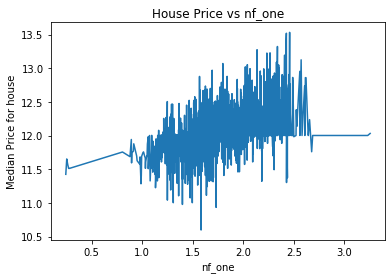

In [250]:
combined_data.groupby('nf_one')['SalePrice'].median().plot()
plt.xlabel('nf_one')
plt.ylabel('Median Price for house')
plt.title("House Price vs nf_one")

Text(0.5, 1.0, 'House Price vs nf_two')

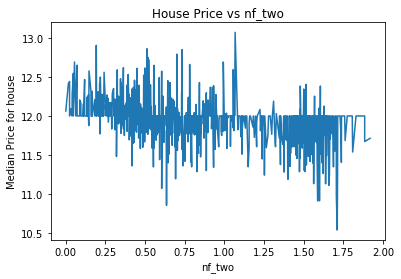

In [251]:
combined_data.groupby('nf_two')['SalePrice'].median().plot()
plt.xlabel('nf_two')
plt.ylabel('Median Price for house')
plt.title("House Price vs nf_two")

Text(0.5, 1.0, 'House Price vs nf_three')

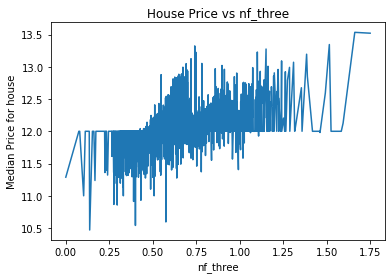

In [252]:
combined_data.groupby('nf_three')['SalePrice'].median().plot()
plt.xlabel('nf_three')
plt.ylabel('Median Price for house')
plt.title("House Price vs nf_three")

Text(0.5, 1.0, 'House Price vs nf_four')

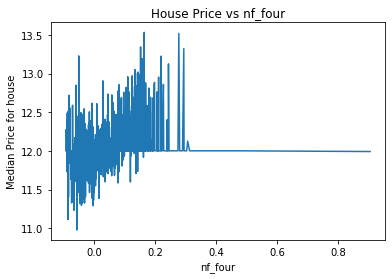

In [253]:
combined_data.groupby('nf_four')['SalePrice'].median().plot()
plt.xlabel('nf_four')
plt.ylabel('Median Price for house')
plt.title("House Price vs nf_four")

Text(0.5, 1.0, 'House Price vs nf_five')

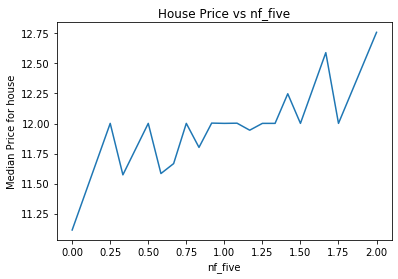

In [254]:
combined_data.groupby('nf_five')['SalePrice'].median().plot()
plt.xlabel('nf_five')
plt.ylabel('Median Price for house')
plt.title("House Price vs nf_five")

In [255]:
salepricedata = combined_data['SalePrice']

In [256]:
combined_data.drop(['SalePrice'],axis =1,inplace= True)

In [257]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(combined_data,salepricedata,test_size=0.2,random_state=0)

In [258]:
X_train.columns

Index(['Foundation', 'Fireplaces', 'TotRmsAbvGrd', 'BsmtFinSF1', '2ndFlrSF',
       'GarageFinish', 'LotArea', 'FireplaceQu', 'GarageYrBlt', 'YearRemodAdd',
       'FullBath', 'KitchenQual', 'GarageArea', '1stFlrSF', 'BsmtQual',
       'GarageCars', 'TotalBsmtSF', 'ExterQual', 'YearBuilt', 'Neighborhood',
       'GrLivArea', 'OverallQual', 'PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6',
       'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15',
       'PC16', 'PC17', 'PC18', 'PC19', 'PC20', 'PC21', 'PC22', 'PC23', 'PC24',
       'PC25', 'PC26', 'PC27', 'PC28', 'nf_one', 'nf_two', 'nf_three',
       'nf_four', 'nf_five'],
      dtype='object')

# Model 1 - Random Forest Regressor 

In [259]:
model = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=30,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=5,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False )

model.fit(X_train,y_train)

RandomForestRegressor(max_depth=30, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=5, n_estimators=200, n_jobs=1)

In [260]:
y_pred= model.predict(X_test)



In [261]:
y_test = np.exp(y_test)

In [262]:
y_test

355     163000.0
1411    163000.0
1232    101800.0
517     163000.0
22      230000.0
          ...   
1254    165400.0
108     163000.0
621     240000.0
1328    256000.0
993     163000.0
Name: SalePrice, Length: 584, dtype: float64

In [263]:
y_pred = np.exp(y_pred)

In [264]:
y_pred[::10]

array([161947.02933512,  96635.04736762, 163040.16212841, 130073.32126533,
       179110.10071739, 163173.39788756, 148698.9767906 , 177845.81399852,
       157835.77586904, 162152.81034183, 166599.44136731, 162265.17961773,
       115941.79427073, 163347.29029367, 162230.2106495 , 111611.52453165,
       153080.49067066, 221992.37818808, 217987.25428943, 161362.394461  ,
       149113.97202572, 243738.29115808, 148288.43290795, 178493.23439164,
       163359.21352416, 105064.59212915, 162957.69492763, 161629.98147984,
       144518.18784694, 118650.64788353, 163087.50242308, 170908.72317977,
       273988.73897576, 168786.4954059 , 201431.37679459, 122476.07729054,
       258186.75448864, 211246.51980359, 162228.92506796, 162927.67879408,
       162857.56001238, 162922.46886969, 157094.32624904, 100818.01605147,
       162712.24620283, 148152.84365956, 134710.04123218, 158636.37534216,
       162348.78744442, 139816.87086462, 161938.60261501, 165911.52709414,
       161589.06299746, 1

In [265]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [266]:
np.mean(y_pred)

170298.03273760778

In [267]:
np.mean(y_test)

171181.96917808222

In [268]:
print("RMS: %r " % np.sqrt(np.mean((y_pred - y_test) ** 2)))

RMS: 18160.64654526263 


In [269]:
mean_absolute_error(y_test,y_pred)


9045.533057485838

In [270]:
mean_squared_error(y_test,y_pred)


329809082.94195944

In [271]:
r2_score(y_test,y_pred)

0.8706531703136102

Here we get the r2 score of 0.871 which is close to 1 so our model percentage of the response variable variation is decent. Our model fits the data in a decent proportion. 

# Model 2 -> Support Vector Machine 

lets use svm regressor since it uses marignal planes, this might help us increases the accuracy. 

In [272]:
#We used linear and poly kernel for this model, but it fits best into rbf kernel

from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

SVR()

In [273]:
y_pred = regressor.predict(X_test)


In [274]:
y_pred = np.exp(y_pred)

In [275]:
y_pred[::10]

array([144393.75174629,  96752.07456273, 156163.2259652 , 140769.19085389,
       171572.3997786 , 155035.09160574, 151819.6589235 , 182351.20451175,
       159829.51021803, 149368.49071349, 161335.74380363, 155874.42249304,
       109960.56369762, 168158.16170086, 149105.19479144, 103525.98360964,
       150975.18683961, 252104.21188725, 233350.63079859, 155553.75751739,
       156372.51555409, 233866.09203508, 153649.82156704, 182600.11054239,
       172344.07641264, 105088.37978982, 155543.8943402 , 156220.52921456,
       158429.02275079, 108597.47378214, 152722.60195833, 160846.58083434,
       311853.4291312 , 164238.53178782, 213358.00371358, 121444.58872995,
       256363.18272008, 229406.39118755, 156935.04129816, 160811.65085351,
       163466.4760713 , 153282.27710925, 157168.65813142,  97634.74579652,
       155812.91583014, 145727.25777233, 135325.58553218, 151929.43282511,
       164346.91665087, 133139.64535716, 155529.32184082, 165958.43055066,
       148904.12511539, 1

In [276]:
y_test

355     163000.0
1411    163000.0
1232    101800.0
517     163000.0
22      230000.0
          ...   
1254    165400.0
108     163000.0
621     240000.0
1328    256000.0
993     163000.0
Name: SalePrice, Length: 584, dtype: float64

In [277]:
r2_score(y_test,y_pred)

0.8889846462329637

In [278]:
print("RMS: %r " % np.sqrt(np.mean((y_pred - y_test) ** 2)))

RMS: 16824.607264151036 


In [279]:
mean_absolute_error(y_test,y_pred)


11401.073850923489

In [280]:
mean_squared_error(y_test,y_pred)


283067409.5929239


# Model 3 - Linear Regression


In [281]:
from sklearn.linear_model import LinearRegression


In [282]:
model = LinearRegression().fit(X_train, y_train)


In [283]:
y_pred = model.predict(X_test)


In [284]:
y_pred = np.exp(y_pred)

In [285]:
y_pred[::10]

array([147856.87793327,  97492.10264545, 149861.36692401, 143705.23681323,
       186006.7063585 , 148818.84341554, 162017.75800303, 187365.48434869,
       147307.40891778, 148563.59808127, 169977.20172396, 161068.75326437,
       116579.549283  , 164293.17424693, 152499.15751303, 112360.07076866,
       163775.06154285, 222033.98555615, 200719.58357241, 162776.0184632 ,
       158110.1408295 , 233297.55786304, 148119.94930849, 186509.75333486,
       174102.37835953, 111171.41129569, 154751.83476585, 169053.7873882 ,
       148589.66972564, 105804.87888254, 157224.8033467 , 164100.25515548,
       276211.9403748 , 182496.70728933, 217347.76428465, 126770.09064439,
       252016.27436863, 210634.96273867, 148964.24530277, 150265.51397647,
       164719.90300494, 155715.88472091, 153053.97903536, 100248.97214603,
       155037.81909102, 139978.46653796, 131226.0008936 , 139163.86358555,
       164704.82313773, 128180.28609486, 155766.97787189, 153817.22217891,
       143875.27684627, 1

In [286]:
r2_score(y_test,y_pred)

0.8278464206263748

In [287]:
mean_absolute_error(y_test,y_pred)


14472.076175816599

In [288]:
mean_squared_error(y_test,y_pred)


438957910.8823374

In [289]:
print("RMS: %r " % np.sqrt(np.mean((y_pred - y_test) ** 2)))

RMS: 20951.32241368877 


Out of all the three models SVM has the lowest rms value and highest r2 score. So we can say that SVM model does a good job out the three models in getting the best fit line for the data. Also, we can make a siginificant impact in making this model more generalized if we use more advanced machine learning techniques like lasso regression and also using some deep learning techqniues likes ANN. Overal this was a good project and we learned all the different valuable machine learning concepts taught in the class and got practical experience with it. 